In [111]:
import numpy as np
import pandas as pd
from math import ceil
import pop_data_processing as pdp

pnc2020_pop_data = np.load('../../pop/pop_PNC/npy_file/pnc2020_pop.npy')
pnc2020_data = pnc2020_pop_data[0, :, :]
pop_bt = pnc2020_pop_data[1, :, :]
pop_mt = pnc2020_pop_data[2, :, :]
pop_ft = pnc2020_pop_data[3, :, :]
pop_bt_0_14 = pnc2020_pop_data[4, :, :]
pop_bt_15_64 = pnc2020_pop_data[5, :, :]
pop_bt_65 = pnc2020_pop_data[6, :, :]

pnc_pop_data = np.array([pnc2020_data.flatten(), pop_bt.flatten()]).T
gender_data = np.array([pnc2020_data.flatten(), pop_bt.flatten(), pop_mt.flatten(),
                          pop_ft.flatten()]).T
age_data = np.array([pnc2020_data.flatten(), pop_bt.flatten(), pop_bt_0_14.flatten(), pop_bt_15_64.flatten(),
                          pop_bt_65.flatten()]).T

# sorted by pnc
pnc_pop_sorted_data = pnc_pop_data[pnc_pop_data[:, 0].argsort()]
gender_sorted_data = gender_data[gender_data[:, 0].argsort()]
age_sorted_data = age_data[age_data[:, 0].argsort()]

# ref : https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Applying_the_degree_of_urbanisation_manual_-_Methodology_for_applying_level_1_of_the_degree_of_urbanisation_classification#Grid_cell_classification
pnclon, pnclat, _, _ = pdp.load_pnc_annual_data()
area_matrix_pnc = pdp.cal_area(pnclat, pnclon)
pnc_area = area_matrix_pnc.mean() # the area about 0.84 km^2
print('The area of a pnc grid cell is about ', pnc_area, ' km^2')
pnc_pop_sorted_df = pd.DataFrame(pnc_pop_sorted_data , columns=['pnc_value', 'pop'])
# divide the population into three categories by population density
pnc_pop_sorted_df['pop_dens'] = pnc_pop_sorted_df['pop'] / pnc_area
pnc_pop_sorted_df['pop dens cities'] = np.where(pnc_pop_sorted_df['pop_dens'] >= 1500,
                                                pnc_pop_sorted_df['pop_dens'], 0)
pnc_pop_sorted_df['pop dens towns'] = np.where((pnc_pop_sorted_df['pop_dens'] >= 300) & 
                                                           (pnc_pop_sorted_df['pop_dens'] < 1500),
                                                           pnc_pop_sorted_df['pop_dens'], 0)
pnc_pop_sorted_df['pop dens rural'] = np.where(pnc_pop_sorted_df['pop_dens'] < 300,
                                                     pnc_pop_sorted_df['pop_dens'], 0)
pnc_pop_sorted_df['pop cities'] = pnc_pop_sorted_df['pop dens cities'] * pnc_area
pnc_pop_sorted_df['pop towns'] = pnc_pop_sorted_df['pop dens towns'] * pnc_area
pnc_pop_sorted_df['pop rural'] = pnc_pop_sorted_df['pop dens rural'] * pnc_area
pnc_pop_sorted_df['pop dens cities proportion'] = pnc_pop_sorted_df['pop dens cities'] / np.sum(pnc_pop_sorted_df['pop dens cities'])
pnc_pop_sorted_df['pop dens towns proportion'] = pnc_pop_sorted_df['pop dens towns'] / np.sum(pnc_pop_sorted_df['pop dens towns'])
pnc_pop_sorted_df['pop dens rural proportion'] = pnc_pop_sorted_df['pop dens rural'] / np.sum(pnc_pop_sorted_df['pop dens rural'])

The area of a pnc grid cell is about  0.8408272440955993  km^2


In [113]:
pnc_10000 = pnc_pop_sorted_df[pnc_pop_sorted_df['pnc_value'] >= 10000]
print('total population >=10000: ', np.sum(pnc_10000['pop']))
print('total population fraction>=10000: ', np.sum(pnc_10000['pop']) / np.sum(pnc_pop_sorted_df['pop']))
print('citues pop fraction >=10000: ', np.sum(pnc_10000['pop cities']) / np.sum(pnc_10000['pop']))
print('towns pop fraction >=10000: ', np.sum(pnc_10000['pop towns']) / np.sum(pnc_10000['pop']))
print('rural pop fraction >=10000: ', np.sum(pnc_10000['pop rural']) / np.sum(pnc_10000['pop']))
pnc_20000 = pnc_pop_sorted_df[pnc_pop_sorted_df['pnc_value'] >= 20000]
print('total population >=20000: ', np.sum(pnc_20000['pop']) / np.sum(pnc_pop_sorted_df['pop']))
print('citues pop fraction >=20000: ', np.sum(pnc_20000['pop cities']) / np.sum(pnc_20000['pop']))
print('towns pop fraction >=20000: ', np.sum(pnc_20000['pop towns']) / np.sum(pnc_20000['pop']))
print('rural pop fraction >=20000: ', np.sum(pnc_20000['pop rural']) / np.sum(pnc_20000['pop']))
cities_data = pnc_pop_sorted_df[pnc_pop_sorted_df['pop dens cities'] > 0]
towns_data = pnc_pop_sorted_df[pnc_pop_sorted_df['pop dens towns'] > 0]
rural_data = pnc_pop_sorted_df[pnc_pop_sorted_df['pop dens rural'] > 0]
cities_fraction = np.sum(pnc_pop_sorted_df['pop cities']) / np.sum(pnc_pop_sorted_df['pop'])
towns_fraction = np.sum(pnc_pop_sorted_df['pop towns']) / np.sum(pnc_pop_sorted_df['pop'])
rural_fraction = np.sum(pnc_pop_sorted_df['pop rural']) / np.sum(pnc_pop_sorted_df['pop'])
print(towns_fraction/rural_fraction, towns_fraction/cities_fraction)

total population >=10000:  1726293.382333239
total population fraction>=10000:  0.19513734338969246
citues pop fraction >=10000:  0.5081579603665242
towns pop fraction >=10000:  0.4193085202181054
rural pop fraction >=10000:  0.07253351941537048
total population >=20000:  0.04404661572477467
citues pop fraction >=20000:  0.5581842360924817
towns pop fraction >=20000:  0.38311320085582556
rural pop fraction >=20000:  0.05870256305169288
1.6266372984138209 1.961466485711386


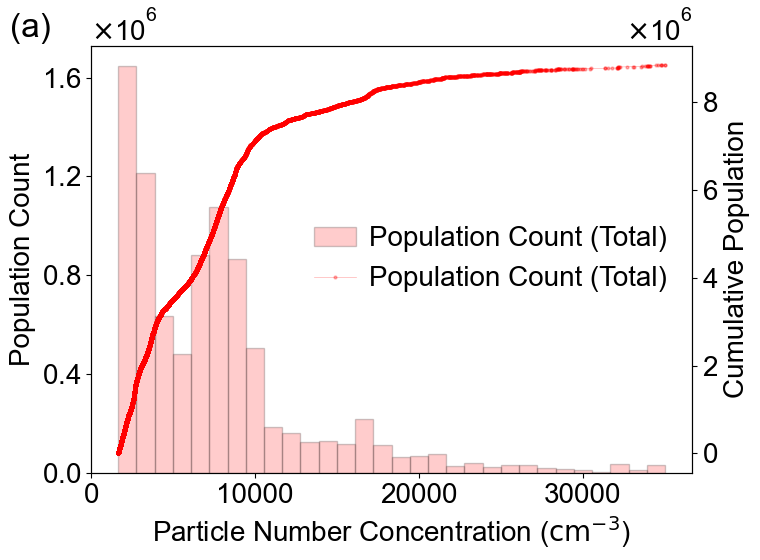

In [67]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 20
from matplotlib.ticker import ScalarFormatter, MaxNLocator
from matplotlib.transforms import Bbox

fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
weights = gender_sorted_data[:, 1]
standard_error = np.std(weights) / np.sqrt(len(weights))
counts, bins, bars = ax.hist(gender_sorted_data[:, 0], weights=weights,
                              bins=30, color='red', edgecolor='k', alpha=0.2,
                              label='Population Count (Total)')
bin_centers = 0.5 * (bins[1:] + bins[:-1])
ax.set_xlabel(r"Particle Number Concentration ($\mathrm{cm}^{-3}$)")
ax.set_ylabel('Population Count')
ax.xaxis.set_major_locator(MaxNLocator(4))
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax2 = ax.twinx()
ax2.plot(gender_sorted_data[:, 0], np.cumsum(gender_sorted_data[:, 1]).flatten(),
         marker='o', color='r', markersize=2, alpha=0.3, linestyle='-', linewidth=0.5,
         label='Population Count (Total)')
ax2.set_xlabel(r"Particle Number Concentration ($\mathrm{cm}^{-3}$)")
ax2.set_ylabel('Cumulative Population')
ax2.xaxis.set_major_locator(MaxNLocator(4))
ax2.yaxis.set_major_locator(MaxNLocator(5))
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right',
           frameon=False, fontsize=20, handlelength=1.5, handletextpad=0.5)

plt.gca().title.set_text(f'(a)')
plt.gca().title.set_position([-0.1, 1.2])
plt.tight_layout()
plt.savefig('./figure/total_pop.png', dpi=600, bbox_inches='tight')
plt.show()

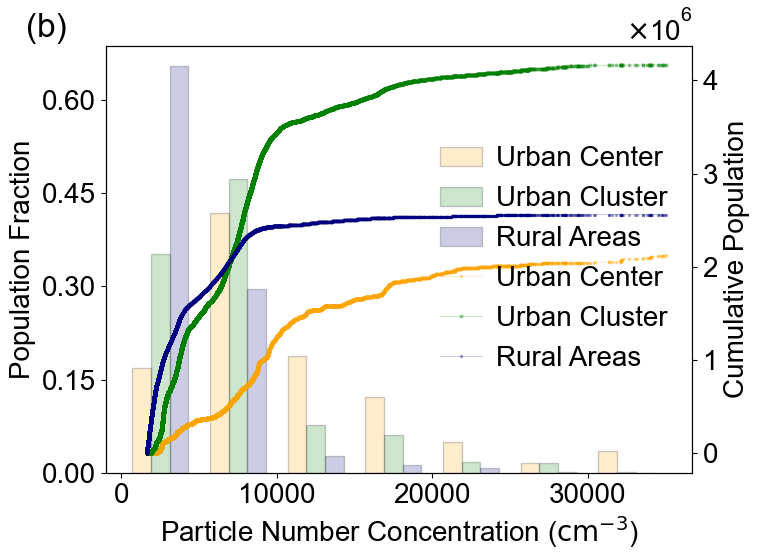

In [68]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 20
from matplotlib.ticker import ScalarFormatter, MaxNLocator
from matplotlib.transforms import Bbox

fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
weights_urban = pnc_pop_sorted_df['pop dens cities proportion'].values
weeights_urban_rural = pnc_pop_sorted_df['pop dens towns proportion'].values
weights_rural = pnc_pop_sorted_df['pop dens rural proportion'].values
standard_error_urban = np.std(weights_urban) / np.sqrt(len(weights_urban))
standard_error_urban_rural = np.std(weeights_urban_rural) / np.sqrt(len(weeights_urban_rural))
standard_error_rural = np.std(weights_rural) / np.sqrt(len(weights_rural))
# bins = np.linspace(pnc_pop_sorted_df['pnc_value'].min(), pnc_pop_sorted_df['pnc_value'].max(), 8)
# bin_centers = 0.5 * (bins[1:] + bins[:-1])
bins = np.array([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000])
bin_centers = np.array([2500, 7500, 12500, 17500, 22500, 27500, 32500])
bin_width = 1200
hist1, _ = np.histogram(pnc_pop_sorted_df['pnc_value'], bins=bins, weights=weights_urban)
hist2, _ = np.histogram(pnc_pop_sorted_df['pnc_value'], bins=bins, weights=weeights_urban_rural)
hist3, _ = np.histogram(pnc_pop_sorted_df['pnc_value'], bins=bins, weights=weights_rural)
ax.bar(bin_centers - bin_width, hist1, width=bin_width, color='orange',
        edgecolor='black', label='Urban Center', alpha=0.2)
ax.bar(bin_centers, hist2, width=bin_width, color='green',
        edgecolor='black', label='Urban Cluster', alpha=0.2)
ax.bar(bin_centers + bin_width, hist3, width=bin_width, color='navy',
        edgecolor='black', label='Rural Areas', alpha=0.2)
ax.set_xlabel(r"Particle Number Concentration ($\mathrm{cm}^{-3}$)")
ax.set_ylabel('Population Fraction')
ax.xaxis.set_major_locator(MaxNLocator(4))
ax.yaxis.set_major_locator(MaxNLocator(5))

ax2 = ax.twinx()
ax2.plot(pnc_pop_sorted_df['pnc_value'],
         np.cumsum(pnc_pop_sorted_df['pop cities']),
         marker='s', color='orange', markersize=2, alpha=0.3, linestyle='-', linewidth=0.5,
         label='Urban Center')
ax2.plot(pnc_pop_sorted_df['pnc_value'],
         np.cumsum(pnc_pop_sorted_df['pop towns']),
         marker='X', color='green', markersize=2, alpha=0.3, linestyle='-', linewidth=0.5,
         label='Urban Cluster')
ax2.plot(pnc_pop_sorted_df['pnc_value'],
         np.cumsum(pnc_pop_sorted_df['pop rural']),
         marker='*', color='navy', markersize=2, alpha=0.3, linestyle='-', linewidth=0.5,
         label='Rural Areas')
ax2.set_xlabel(r"Particle Number Concentration ($\mathrm{cm}^{-3}$)")
ax2.set_ylabel('Cumulative Population')
ax2.xaxis.set_major_locator(MaxNLocator(4))
ax2.yaxis.set_major_locator(MaxNLocator(5))
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right',
           frameon=False, fontsize=20, handlelength=1.5, handletextpad=0.5)
plt.gca().title.set_text(f'(b)')
plt.gca().title.set_position([-0.1, 1.2])
plt.tight_layout()
plt.savefig('./figure/URBN_type_hist.png', dpi=600, bbox_inches='tight')
plt.show()

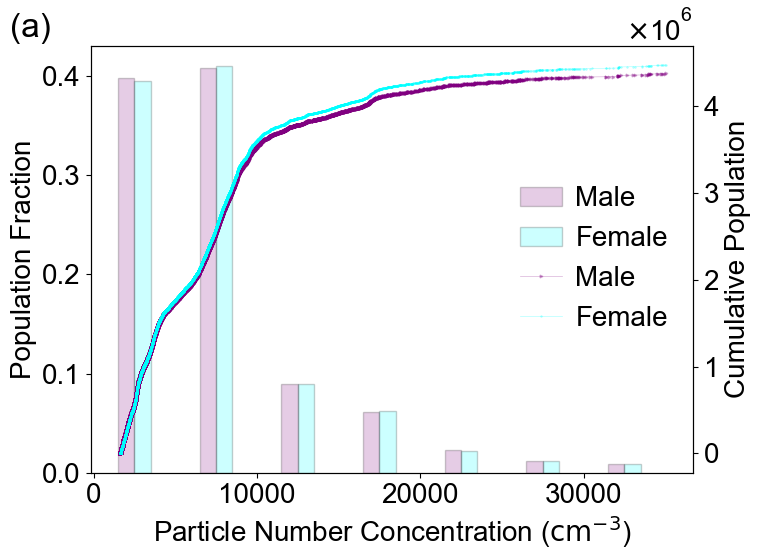

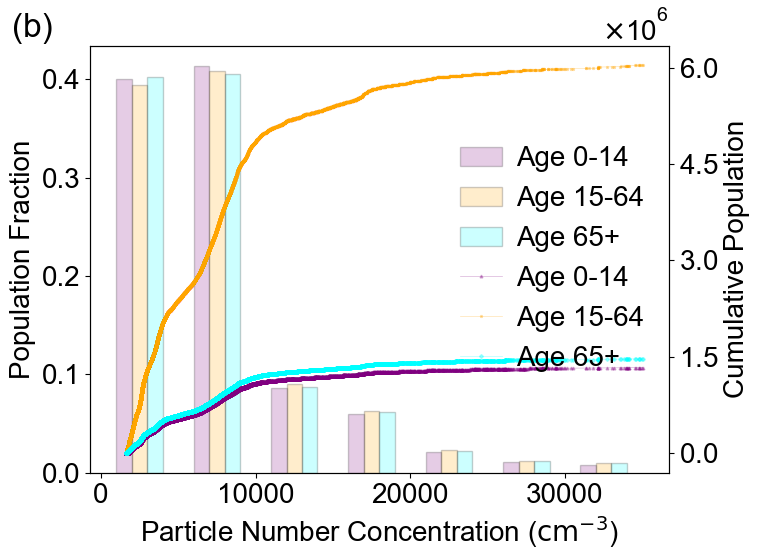

In [69]:
# SI-age and gender
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 20
from matplotlib.ticker import ScalarFormatter, MaxNLocator

fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
weights_male = gender_sorted_data[:, 2]/np.sum(gender_sorted_data[:, 2])
weights_female = gender_sorted_data[:, 3]/np.sum(gender_sorted_data[:, 3])
standard_error_male = np.std(weights_male) / np.sqrt(len(weights_male))
standard_error_female = np.std(weights_female) / np.sqrt(len(weights_female))
# bins = np.linspace(gender_sorted_data[:, 0].min(), gender_sorted_data[:, 0].max(), 15)
# bin_centers = 0.5 * (bins[:-1] + bins[1:])
bins = np.array([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000])
bin_centers = np.array([2500, 7500, 12500, 17500, 22500, 27500, 32500])
bin_width = 2000
hist1, _ = np.histogram(gender_sorted_data[:, 0], bins=bins, weights=weights_male)
hist2, _ = np.histogram(gender_sorted_data[:, 0], bins=bins, weights=weights_female)
ax.bar(bin_centers - bin_width/4, hist1, width=bin_width/2, color='purple',
        edgecolor='black', label='Male', alpha=0.2)
ax.bar(bin_centers + bin_width/4, hist2, width=bin_width/2, color='cyan',
        edgecolor='black', label='Female', alpha=0.2)
ax.set_xlabel(r"Particle Number Concentration ($\mathrm{cm}^{-3}$)")
ax.set_ylabel('Population Fraction')
ax.xaxis.set_major_locator(MaxNLocator(4))
ax.yaxis.set_major_locator(MaxNLocator(5))
ax2 = ax.twinx()
ax2.plot(gender_sorted_data[:, 0], np.cumsum(gender_sorted_data[:, 2]).flatten(),
         marker='>', color='purple', markersize=2, alpha=0.3, linestyle='-', linewidth=0.5,
         label='Male')
ax2.plot(gender_sorted_data[:, 0], np.cumsum(gender_sorted_data[:, 3]).flatten(),
         marker='+', color='cyan', markersize=2, alpha=0.3, linestyle='-', linewidth=0.5,
         label='Female')
ax2.set_xlabel(r"Particle Number Concentration ($\mathrm{cm}^{-3}$)")
ax2.set_ylabel('Cumulative Population')
ax2.xaxis.set_major_locator(MaxNLocator(4))
ax2.yaxis.set_major_locator(MaxNLocator(5))
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right',
           frameon=False, fontsize=20, handlelength=1.5, handletextpad=0.5)
plt.gca().title.set_text(f'(a)')
plt.gca().title.set_position([-0.1, 1.2])
plt.tight_layout()
plt.savefig('../SI_figure/S4/gender_hist.png', dpi=600, bbox_inches='tight')
plt.show()


fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
weights_age_0_14 = age_sorted_data[:, 2]/np.sum(age_sorted_data[:, 2])
weights_age_15_64 = age_sorted_data[:, 4]/np.sum(age_sorted_data[:, 4])
weights_age_65 = age_sorted_data[:, 3]/np.sum(age_sorted_data[:, 3])
standard_error_age_0_14 = np.std(weights_age_0_14) / np.sqrt(len(weights_age_0_14))
standard_error_age_15_64 = np.std(weights_age_15_64) / np.sqrt(len(weights_age_15_64))
standard_error_age_65 = np.std(weights_age_65) / np.sqrt(len(weights_age_65))
# bins = np.linspace(age_sorted_data[:, 0].min(), age_sorted_data[:, 0].max(), 10)
# bin_centers = 0.5 * (bins[:-1] + bins[1:])
# bin_width = np.diff(bins)[0]/3
bins  = np.array([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000])
bin_centers = np.array([2500, 7500, 12500, 17500, 22500, 27500, 32500])
bin_width = 1000
hist1, _ = np.histogram(age_sorted_data[:, 0], bins=bins, weights=weights_age_0_14)
hist2, _ = np.histogram(age_sorted_data[:, 0], bins=bins, weights=weights_age_15_64)
hist3, _ = np.histogram(age_sorted_data[:, 0], bins=bins, weights=weights_age_65)
ax.bar(bin_centers - bin_width, hist1, width=bin_width, color='purple',
       edgecolor='black', label='Age 0-14', alpha=0.2)
ax.bar(bin_centers, hist3, width=bin_width, color='orange',
       edgecolor='black', label='Age 15-64', alpha=0.2)
ax.bar(bin_centers + bin_width, hist2, width=bin_width, color='cyan',
        edgecolor='black', label='Age 65+', alpha=0.2)
ax.set_xlabel(r"Particle Number Concentration ($\mathrm{cm}^{-3}$)")
ax.set_ylabel('Population Fraction')
ax.xaxis.set_major_locator(MaxNLocator(4))
ax.yaxis.set_major_locator(MaxNLocator(5))
ax2 = ax.twinx()
ax2.plot(age_sorted_data[:, 0], np.cumsum(age_sorted_data[:, 2]).flatten(), 
         marker='^', color='purple', markersize=2, alpha=0.3, linestyle='-', linewidth=0.5,
            label='Age 0-14')
ax2.plot(age_sorted_data[:, 0], np.cumsum(age_sorted_data[:, 3]).flatten(), 
         marker='*', color='orange', markersize=2, alpha=0.3, linestyle='-', linewidth=0.5,
            label='Age 15-64')
ax2.plot(age_sorted_data[:, 0], np.cumsum(age_sorted_data[:, 4]).flatten(), 
         marker='D', color='cyan', markersize=2, alpha=0.3, linestyle='-', linewidth=0.5,
            label='Age 65+')
ax2.set_xlabel(r"Particle Number Concentration ($\mathrm{cm}^{-3}$)")
ax2.set_ylabel('Cumulative Population')
ax2.xaxis.set_major_locator(MaxNLocator(4))
ax2.yaxis.set_major_locator(MaxNLocator(5))
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right',
           frameon=False, fontsize=20, handlelength=1.5, handletextpad=0.5)
plt.gca().title.set_text(f'(b)')
plt.gca().title.set_position([-0.1, 1.2])
plt.tight_layout()
plt.savefig('../SI_figure/S4/age_hist.png', dpi=600, bbox_inches='tight')
plt.show()

In [70]:
import pop_data_processing as pdp
import numpy as np

pnc_pop_npy_filename = '../../pop/pop_PNC/npy_file/pnc2020_pop.npy'
weighted_data_all = pdp.get_distirct_data_with_tiff(pnc_pop_npy_filename)
pnclon, pnclat, _, _ = pdp.load_pnc_annual_data()
area_matrix_pnc = pdp.cal_area(pnclat, pnclon)
pnc_area = area_matrix_pnc.mean() # the area about 0.84 km^2
print(weighted_data_all.columns)

Index(['District', 'pnc2020_mean', 'pnc2020_sum', 'pnc_pop_bt_mean',
       'pnc_pop_bt_sum', 'pnc_pop_mt_mean', 'pnc_pop_mt_sum',
       'pnc_pop_ft_mean', 'pnc_pop_ft_sum', 'pnc_pop_bt_0_14_mean',
       'pnc_pop_bt_0_14_sum', 'pnc_pop_bt_15_64_mean', 'pnc_pop_bt_15_64_sum',
       'pnc_pop_bt_65_mean', 'pnc_pop_bt_65_sum', 'pop_bt_mean', 'pop_bt_sum',
       'pop_mt_mean', 'pop_mt_sum', 'pop_ft_mean', 'pop_ft_sum',
       'pop_bt_0_14_mean', 'pop_bt_0_14_sum', 'pop_bt_15_64_mean',
       'pop_bt_15_64_sum', 'pop_bt_65_mean', 'pop_bt_65_sum'],
      dtype='object')


In [114]:
import numpy as np

weighted_data_all['weighted_pnc_pop_bt'] = weighted_data_all['pnc_pop_bt_sum'] / weighted_data_all['pop_bt_sum']
# divide the population into three categories by population density
weighted_data_all['pop_bt_dens'] = weighted_data_all['pop_bt_mean'] / pnc_area
weighted_data_all['cities'] = np.where(weighted_data_all['pop_bt_dens'] >= 1500, 1, 0)
weighted_data_all['towns'] = np.where((weighted_data_all['pop_bt_dens'] >= 300) & 
                                      (weighted_data_all['pop_bt_dens'] < 1500), 1, 0)
weighted_data_all['rural'] = np.where(weighted_data_all['pop_bt_dens'] < 300, 1, 0)
weighted_data_all['CH'] = weighted_data_all['cities']*3 + weighted_data_all['towns']*2 + weighted_data_all['rural']
weighted_data_all['cities_pnc'] = weighted_data_all['cities'] * weighted_data_all['pnc2020_mean']
weighted_data_all['towns_pnc'] = weighted_data_all['towns'] * weighted_data_all['pnc2020_mean']
weighted_data_all['rural_pnc'] = weighted_data_all['rural'] * weighted_data_all['pnc2020_mean']
weighted_data_all['cities_pnc_pop'] = weighted_data_all['cities'] * weighted_data_all['weighted_pnc_pop_bt']
weighted_data_all['towns_pnc_pop'] = weighted_data_all['towns'] * weighted_data_all['weighted_pnc_pop_bt']
weighted_data_all['rural_pnc_pop'] = weighted_data_all['rural'] * weighted_data_all['weighted_pnc_pop_bt']
ajdusted_pop = np.sum(pnc_pop_sorted_df['pop'])/np.sum(weighted_data_all['pop_bt_mean'])
weighted_data_all['pop_bt_mean'] = weighted_data_all['pop_bt_mean'] * ajdusted_pop

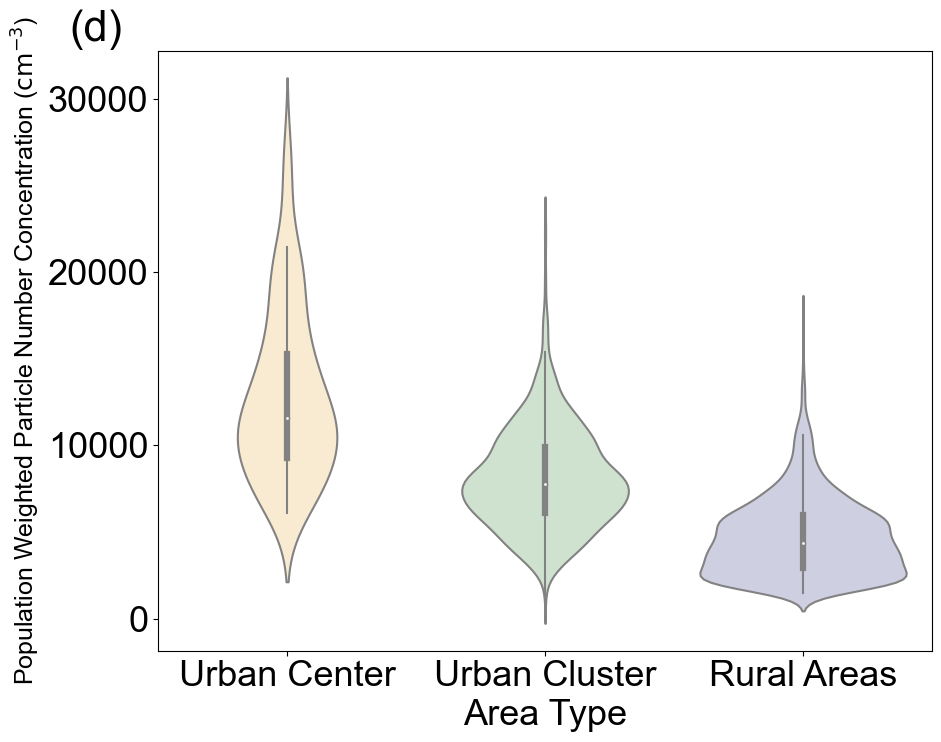

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FixedLocator
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 26

cities_pnc = weighted_data_all['cities_pnc_pop']
towns_pnc = weighted_data_all['towns_pnc_pop']
rural_pnc = weighted_data_all['rural_pnc_pop']
cities_pnc = cities_pnc[(cities_pnc != 0)&(cities_pnc > 0)]
towns_pnc = towns_pnc[(towns_pnc != 0)&(towns_pnc > 0)]
rural_pnc = rural_pnc[(rural_pnc != 0)&(rural_pnc > 0)]

data_to_plot = pd.DataFrame({'Urban Center': cities_pnc, 'Urban Cluster': towns_pnc, 'Rural Areas': rural_pnc})
palette = {"Urban Center": "#FFEDCC", "Urban Cluster": "#CCE5CC", "Rural Areas": "#CCCCE5"}
plt.figure(figsize=(10, 8), dpi=100)
sns.violinplot(x='variable', y='value', data=pd.melt(data_to_plot), palette=palette,
               alpha=0.2, linewidth=1.5)
plt.ylabel(r'Population Weighted Particle Number Concentration ($\mathrm{cm}^{-3}$)',
           fontdict={'size': 18})
plt.xlabel('Area Type')
plt.gca().yaxis.set_major_locator(FixedLocator([0, 10000, 20000, 30000]))
plt.gca().title.set_text(f'(d)')
plt.gca().title.set_position([-0.08, 1.2])
plt.tight_layout()
plt.savefig('./figure/pnc_pop_violinplot.png', dpi=600, bbox_inches='tight')
plt.show()

In [116]:
import numpy as np
from scipy.stats import gaussian_kde

data = cities_pnc
kde = gaussian_kde(data)
x = np.linspace(min(data), max(data), 1000)
y = kde.evaluate(x)
max_prob_point = x[np.argmax(y)]
std_dev = np.std(data)
mean = np.mean(data)
cv = std_dev / mean
print(max_prob_point)
print("Coefficient of Variation: ", cv)

10476.599687059745
Coefficient of Variation:  0.37800076029647894


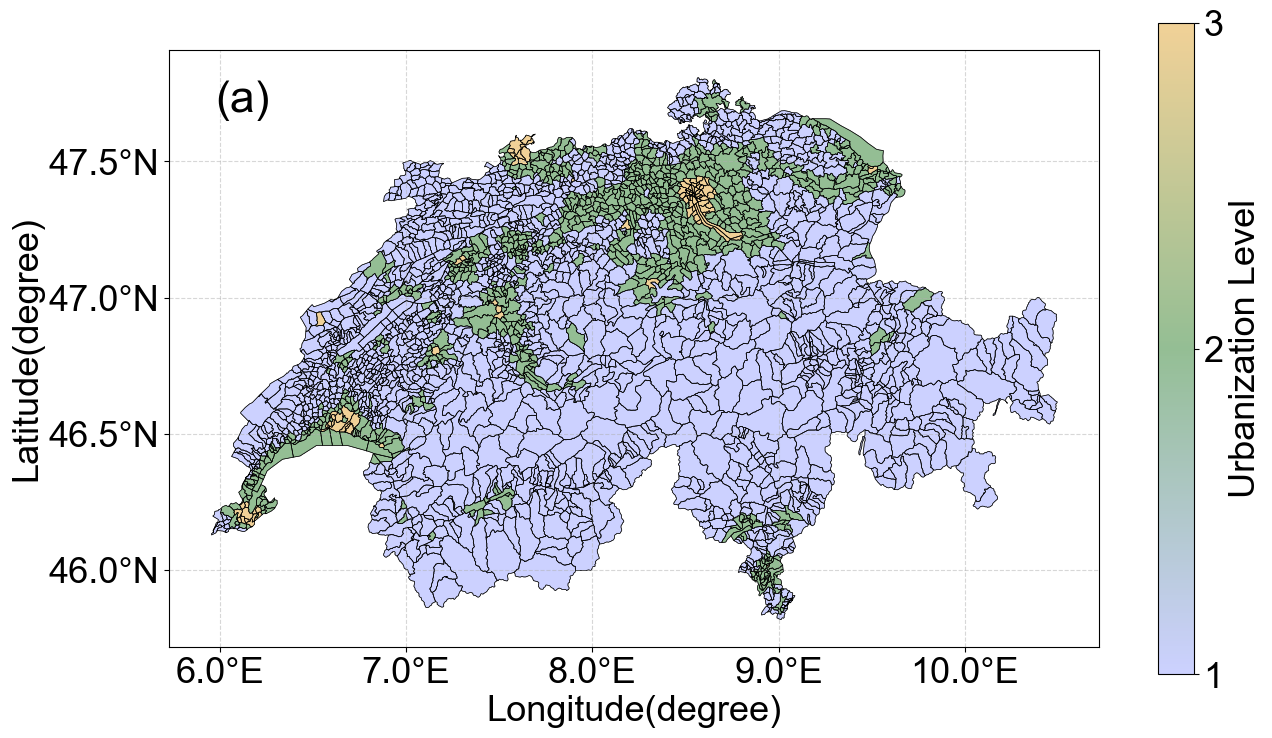

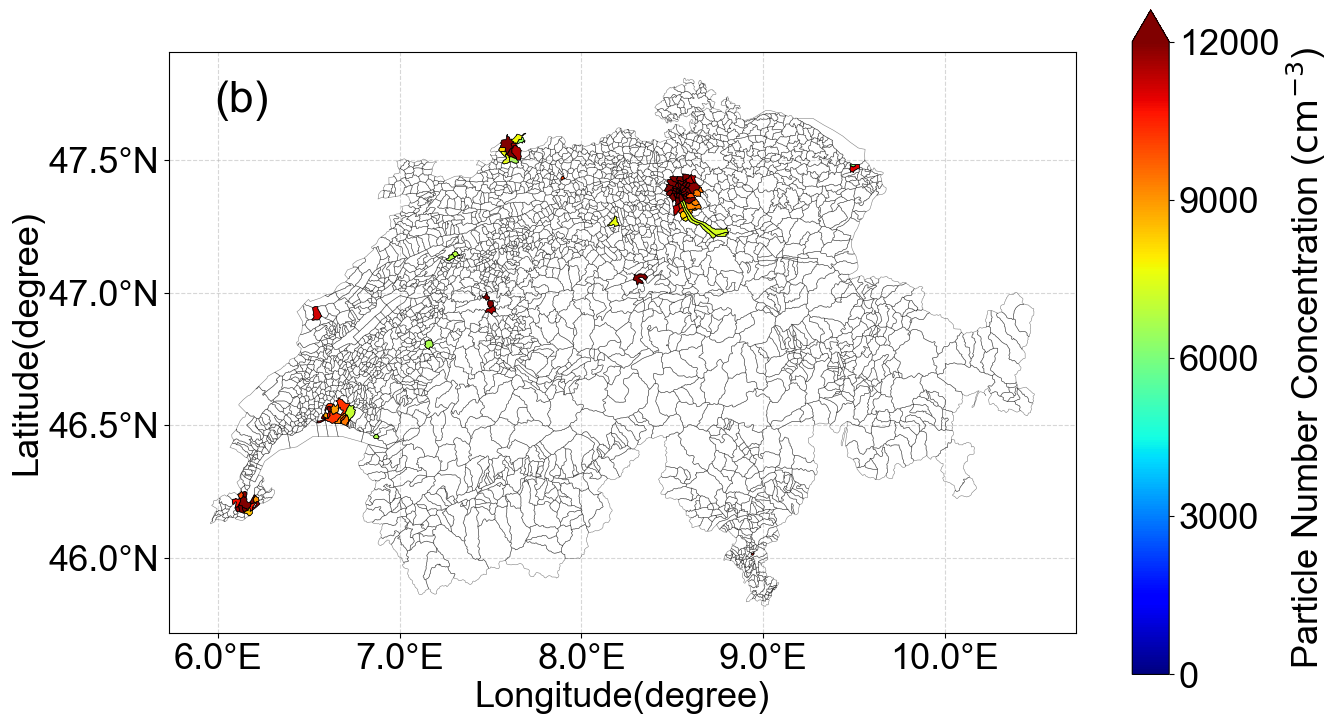

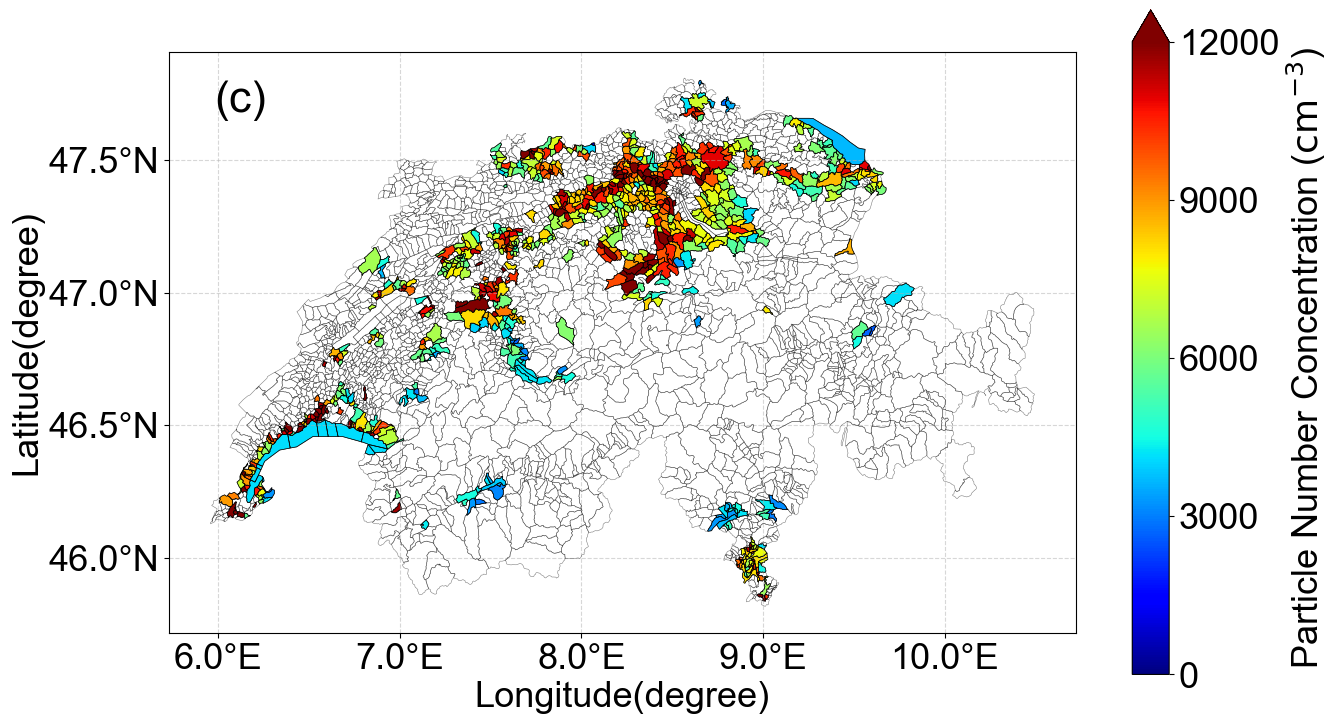

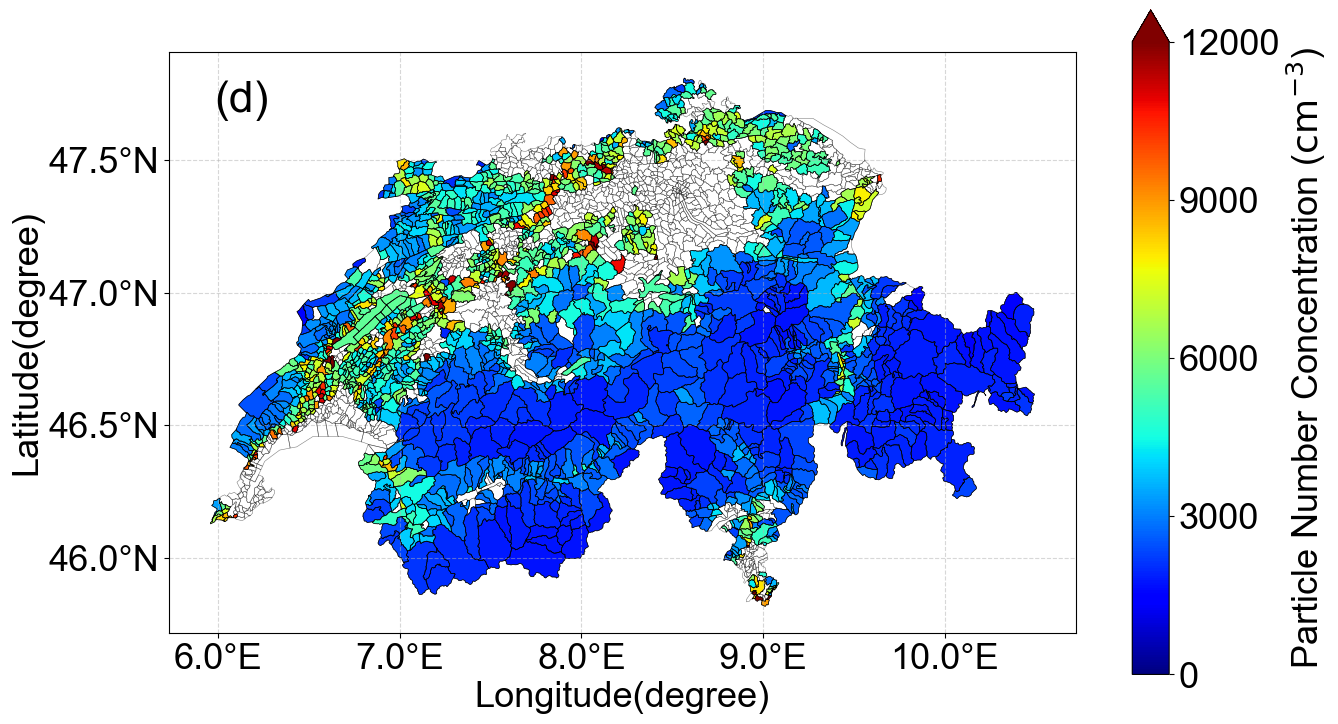

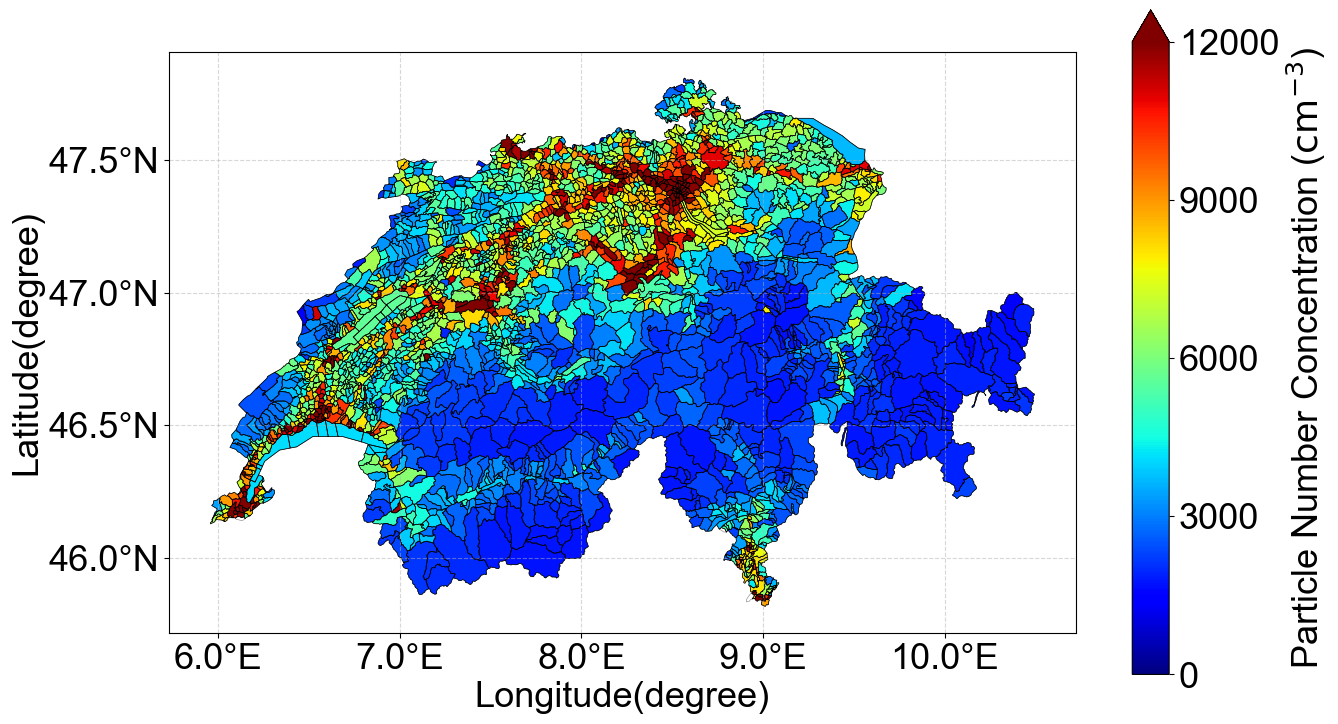

In [117]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator, MaxNLocator
from matplotlib.colors import LinearSegmentedColormap, Normalize
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 26
import numpy as np

def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) / 255.0 for i in range(0, lv, lv // 3))

cmap_dict = {
    'red': "#F1D197",
    'green': "#94BE94",
    'blue': "#CC00FF"
}
cmap_data = {
    'red':   [(0.0, hex_to_rgb(cmap_dict['blue'])[0], hex_to_rgb(cmap_dict['blue'])[0]),
              (0.5, hex_to_rgb(cmap_dict['green'])[0], hex_to_rgb(cmap_dict['green'])[0]),
              (1.0, hex_to_rgb(cmap_dict['red'])[0], hex_to_rgb(cmap_dict['blue'])[0])],
    'green': [(0.0, hex_to_rgb(cmap_dict['blue'])[1], hex_to_rgb(cmap_dict['red'])[1]),
              (0.5, hex_to_rgb(cmap_dict['green'])[1], hex_to_rgb(cmap_dict['green'])[1]),
              (1.0, hex_to_rgb(cmap_dict['red'])[1], hex_to_rgb(cmap_dict['red'])[1])],
    'blue':  [(0.0, hex_to_rgb(cmap_dict['blue'])[2], hex_to_rgb(cmap_dict['blue'])[2]),
              (0.5, hex_to_rgb(cmap_dict['green'])[2], hex_to_rgb(cmap_dict['green'])[2]),
              (1.0, hex_to_rgb(cmap_dict['red'])[2], hex_to_rgb(cmap_dict['red'])[2])]
}
cmap_urbn_level = LinearSegmentedColormap('CustomMap', cmap_data)

gdf = gpd.read_file('../../pncEstimator-main/data/geoshp/gadm36_CHE_3.shp')
weighted_data_all.rename(columns={'District': 'NAME_3'}, inplace=True)
gdf = gdf.merge(weighted_data_all, on='NAME_3', how='inner')

plot_cols = ['CH',
             'cities_pnc_pop', 'towns_pnc_pop', 'rural_pnc_pop',
             'weighted_pnc_pop_bt']
title_list = ['(a)', '(b)', '(c)', '(d)', '(e)']
figure_num = len(plot_cols)
plot_min_max = [(1, 3),
                (0, 12000), (0, 12000), (0, 12000),
                (0, 12000)]
plot_extend = ['max', 'neither']
plot_label = [r"Particle Number Concentration ($\mathrm{cm}^{-3}$)", 'Urbanization Level']
plot_camp = ['jet', cmap_urbn_level]

for i in range(figure_num):
    fig, ax = plt.subplots(1, 1, figsize=(14, 8), dpi=100)
    norm = Normalize(vmin=plot_min_max[i][0], vmax=plot_min_max[i][1], clip=(i in [1, 2, 3]))
    data_to_plot = gdf[gdf[plot_cols[i]] > 0]
    data_to_plot.plot(column=plot_cols[i], ax=ax, legend=False,
                      cmap=plot_camp[0 if i != 0 else 1], edgecolor='k', linewidth=0.5,
                      vmin=plot_min_max[i][0], vmax=plot_min_max[i][1])
    sm = plt.cm.ScalarMappable(cmap=plot_camp[0 if i != 0 else 1], norm=norm)
    sm._A = []
    cbar = fig.colorbar(sm, ax=ax, extend=plot_extend[0 if i != 0 else 1],
                        label=plot_label[0 if i != 0 else 1], aspect=18)
    cbar.locator = MaxNLocator(integer=True, nbins=4)
    gdf.boundary.plot(ax=plt.gca(), edgecolor='k', linewidth=0.4, alpha=0.5)
    cbar.update_ticks()
    ax.set_axis_on()
    ax.set_xlabel('Longitude(degree)')
    ax.set_ylabel('Latitude(degree)')
    x_ticks = ax.get_xticks()
    new_x_ticks = [f'{x:.1f}°E' for x in x_ticks]
    ax.xaxis.set_major_locator(FixedLocator(x_ticks))
    ax.set_xticklabels(new_x_ticks)
    y_ticks = ax.get_yticks()
    new_y_ticks = [f'{y:.1f}°N' for y in y_ticks]
    ax.yaxis.set_major_locator(FixedLocator(y_ticks))
    ax.set_yticklabels(new_y_ticks)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.grid(True, linestyle='--', alpha=0.5)
    if i == 4:
        plt.text(x=0.05, y=0.95, s = '', verticalalignment='top', horizontalalignment='left',
         fontsize=32, transform=plt.gca().transAxes)
    else:  
        plt.text(x=0.05, y=0.95, s = title_list[i], verticalalignment='top', horizontalalignment='left',
         fontsize=32, transform=plt.gca().transAxes)
    plt.tight_layout()
    plt.savefig(f'../SI_figure/S4/{plot_cols[i]}.png', dpi=600, bbox_inches='tight')
    plt.show()

134


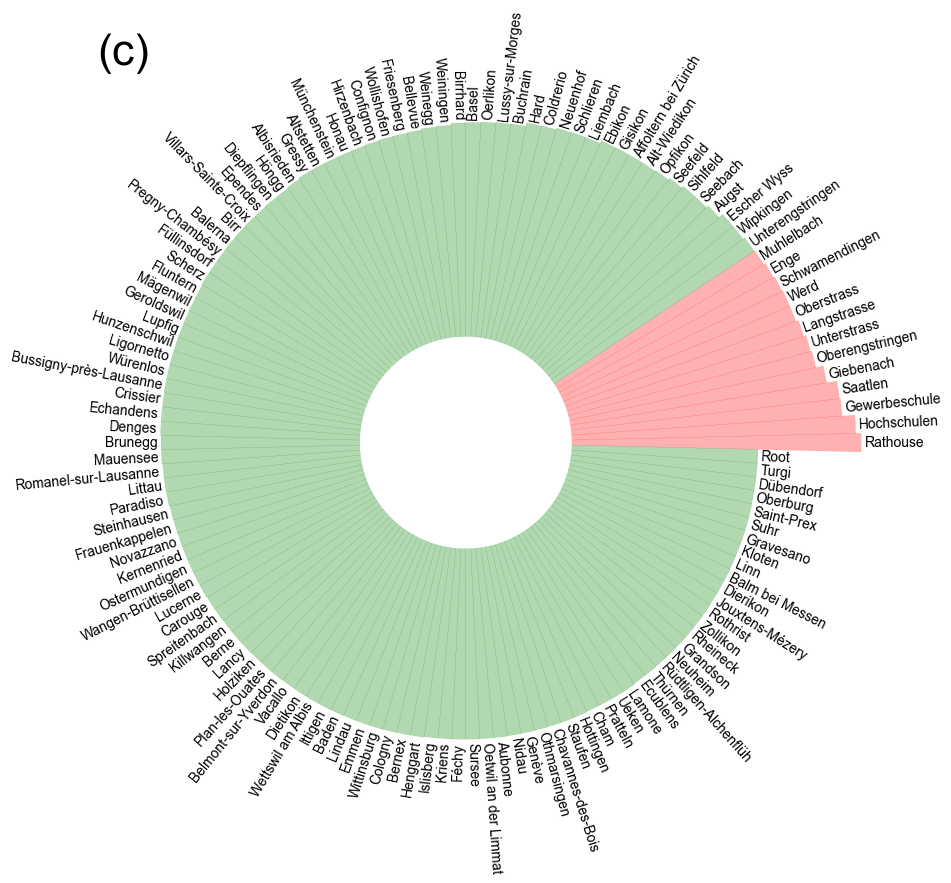

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pop_pnc_0 = weighted_data_all[['NAME_3', 'weighted_pnc_pop_bt']].sort_values(by='weighted_pnc_pop_bt', ascending=False)
pop_pnc_0.columns = ['District', 'weighted_pnc_pop_bt']
pop_pnc_0 = pop_pnc_0.iloc[:int(len(pop_pnc_0)*0.05), :]
print(len(pop_pnc_0))
pop_pnc_0['<20000'] = np.where(pop_pnc_0['weighted_pnc_pop_bt'] < 20000, 1, 0)
pop_pnc_0['>=20000'] = np.where(pop_pnc_0['weighted_pnc_pop_bt'] >= 20000, 1, 0)
pop_pnc_0 = pop_pnc_0.reset_index(drop=True)

plt.figure(figsize=(10, 10), dpi=100)
ax = plt.subplot(111, polar=True)
plt.axis('off')

upperLimit = 1000
lowerLimit = 10000
labelPadding = 300
max_value = pop_pnc_0['weighted_pnc_pop_bt'].max()
slope = (max_value - lowerLimit) / max_value
heights = slope * pop_pnc_0.weighted_pnc_pop_bt + lowerLimit
width = 2 * np.pi / len(pop_pnc_0.index)
angles = [element * width for element in range(len(pop_pnc_0.index))]

for idx, (angle, height, row) in enumerate(zip(angles, heights, pop_pnc_0.itertuples())):
    color = 'red' if row.weighted_pnc_pop_bt >= 20000 else 'green'
    bar = ax.bar(
        x=angle,
        height=height,
        width=width,
        bottom=lowerLimit,
        linewidth=0.2,
        edgecolor=color,
        color=color,
        alpha=0.3
    )
    rotation = np.rad2deg(angle)
    alignment = "right" if np.pi / 2 <= angle < 3 * np.pi / 2 else "left"
    rotation += 180 if alignment == "right" else 0
    ax.text(
        x=angle,
        y=lowerLimit + height + labelPadding,
        s=row.District,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor",
        fontsize=10)
plt.tight_layout()
plt.text(x=0.05, y=1, s = '(c)', verticalalignment='top', horizontalalignment='left',
         fontsize=32, transform=plt.gca().transAxes)
plt.savefig('./figure/polar_plot.png', dpi=600, bbox_inches='tight')
plt.show()

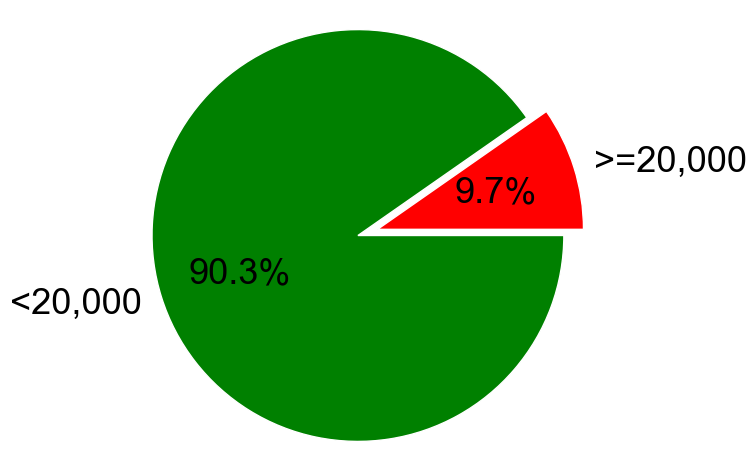

In [119]:
pie_data = [
    (pop_pnc_0['weighted_pnc_pop_bt'] >= 20000).sum(),
    (pop_pnc_0['weighted_pnc_pop_bt'] < 20000).sum()
]
pie_labels = ['>=20,000', '<20,000']
pie_colors = ['red', 'green']
explode = (0.1, 0)

plt.figure(figsize=(6, 6), dpi=100)
plt.pie(pie_data, labels=pie_labels, colors=pie_colors,
        explode=explode, autopct='%1.1f%%', startangle=0, wedgeprops={'edgecolor': 'w'})
plt.axis('equal')
plt.savefig('./figure/pie_plot.png', dpi=600, bbox_inches='tight')
plt.show()

In [120]:
import pandas as pd
import numpy as np

days_data_temp = pd.read_csv('../../pop/pop_PNC/tif_file/pnc_pop_days.csv')
days_data_temp_poppnc = days_data_temp.filter(regex='poppnc')
days_data_temp_array = np.array(days_data_temp)
days_data_temp_high = np.where(days_data_temp_poppnc >= 10000, 1, 0).sum(axis=1)
days_data_temp_low = np.where(days_data_temp_poppnc < 1000, 1, 0).sum(axis=1)
days_data_temp_middle = np.where((days_data_temp_poppnc >= 1000) & (days_data_temp_poppnc < 10000), 1, 0).sum(axis=1)

hours_data_temp = pd.read_csv('../../pop/pop_PNC/tif_file/pnc_pop_hours.csv')
hours_data_temp_poppnc = hours_data_temp.filter(regex='poppnc')
hours_data_temp_array = np.array(hours_data_temp)
hours_data_temp_high = np.where(hours_data_temp_poppnc >= 20000, 1, 0).sum(axis=1)
hours_data_temp_low = np.where(hours_data_temp_poppnc < 20000, 1, 0).sum(axis=1)

pnclon, pnclat, _, _ = pdp.load_pnc_annual_data()
urban_level = weighted_data_all[['NAME_3', 'CH', 'cities', 'towns', 'rural',
                                 'pop_bt_mean', 'pnc2020_mean', 'weighted_pnc_pop_bt']]
urban_level['day_high_pnc_pop'] = np.ceil(days_data_temp_high)
urban_level['day_low_pnc_pop'] = np.ceil(days_data_temp_low)
urban_level['day_middle_pnc_pop'] = np.ceil(days_data_temp_middle)
urban_level['hour_high_pnc_pop'] = np.ceil(hours_data_temp_high)
urban_level['hour_low_pnc_pop'] = np.ceil(hours_data_temp_low)
data_plot = urban_level.copy()
data_plot

NAME_3  CH  cities  towns  rural   pop_bt_mean  pnc2020_mean  \
0           Aarau   2       0      1      0   6784.115765  10222.784799   
1      Biberstein   1       0      0      1   2110.754753   4648.708285   
2           Buchs   2       0      1      0   4403.213671   8137.089408   
3       Densbüren   1       0      0      1   1833.391162   5385.491624   
4      Erlinsbach   1       0      0      1   2429.301172   8000.295850   
...           ...  ..     ...    ...    ...           ...           ...   
2681      Weinegg   3       1      0      0  34751.458050  15308.055200   
2682         Werd   3       1      0      0  36642.795051  20699.477490   
2683    Wipkingen   3       1      0      0  34532.668583  18685.201733   
2684      Witikon   3       1      0      0  29583.306412   9923.099723   
2685  Wollishofen   3       1      0      0  28997.497710  16036.303771   

      weighted_pnc_pop_bt  day_high_pnc_pop  day_low_pnc_pop  \
0            10565.926569             178.0              0.0   
1             4664.026135               1.0              0.0   
2             8640.821927             102.0              0.0   
3             5588.494898              12.0              0.0   
4             8375.824466              82.0              0.0   
...                   ...               ...              ...   
2681         15574.862958             315.0              0.0   
2682         20700.555448             351.0              0.0   
2683         19577.900308             350.0              0.0   
2684          9966.125362             151.0              0.0   
2685         15242.110294             308.0              0.0   

      day_middle_pnc_pop  hour_high_pnc_pop  hour_low_pnc_pop  
0                  187.0              431.0            8329.0  
1                  364.0                0.0            8760.0  
2                  263.0               42.0            8718.0  
3                  353.0                0.0            8760.0  
4                  283.0               64.0            8696.0  
...                  ...                ...               ...  
2681                50.0             2132.0            6628.0  
2682                14.0             3540.0            5220.0  
2683                15.0             3359.0            5401.0  
2684               214.0              158.0            8602.0  
2685                57.0             1997.0            6763.0  

[2686 rows x 13 columns]

In [122]:
data_plot_describe = data_plot.describe()
data_plot_describe

CH       cities        towns        rural   pop_bt_mean  \
count  2686.000000  2686.000000  2686.000000  2686.000000   2686.000000   
mean      1.368206     0.034624     0.298958     0.666418   3293.579942   
std       0.549537     0.182860     0.457886     0.471580   5293.927370   
min       1.000000     0.000000     0.000000     0.000000      0.000000   
25%       1.000000     0.000000     0.000000     0.000000    771.410093   
50%       1.000000     0.000000     0.000000     1.000000   1678.473284   
75%       2.000000     0.000000     1.000000     1.000000   3633.289884   
max       3.000000     1.000000     1.000000     1.000000  57345.826766   

       pnc2020_mean  weighted_pnc_pop_bt  day_high_pnc_pop  day_low_pnc_pop  \
count   2686.000000          2682.000000       2686.000000      2686.000000   
mean    5809.621780          6006.310776         46.681683         0.421072   
std     3191.652116          3290.025320         77.915140         1.842269   
min        0.000000             0.000000          0.000000         0.000000   
25%     3433.684461          3581.259248          0.000000         0.000000   
50%     5352.045200          5503.107252          5.000000         0.000000   
75%     7444.208057          7653.131289         59.000000         0.000000   
max    27247.251344         27249.231745        365.000000        16.000000   

       day_middle_pnc_pop  hour_high_pnc_pop  hour_low_pnc_pop  
count         2686.000000        2686.000000       2686.000000  
mean           317.353686         147.521221       8599.433358  
std             78.624346         468.598051        574.355245  
min              0.000000           0.000000          0.000000  
25%            305.000000           0.000000       8746.000000  
50%            358.000000           0.000000       8760.000000  
75%            365.000000          14.000000       8760.000000  
max            365.000000        5245.000000       8760.000000

In [144]:
data_plot_describe[data_plot_describe['day_high_pnc_pop']>0]

CH       cities        towns        rural   pop_bt_mean  \
count  2686.000000  2686.000000  2686.000000  2686.000000   2686.000000   
mean      1.368206     0.034624     0.298958     0.666418   3293.579942   
std       0.549537     0.182860     0.457886     0.471580   5293.927370   
50%       1.000000     0.000000     0.000000     1.000000   1678.473284   
75%       2.000000     0.000000     1.000000     1.000000   3633.289884   
max       3.000000     1.000000     1.000000     1.000000  57345.826766   

       pnc2020_mean  weighted_pnc_pop_bt  day_high_pnc_pop  day_low_pnc_pop  \
count   2686.000000          2682.000000       2686.000000      2686.000000   
mean    5809.621780          6006.310776         46.681683         0.421072   
std     3191.652116          3290.025320         77.915140         1.842269   
50%     5352.045200          5503.107252          5.000000         0.000000   
75%     7444.208057          7653.131289         59.000000         0.000000   
max    27247.251344         27249.231745        365.000000        16.000000   

       day_middle_pnc_pop  hour_high_pnc_pop  hour_low_pnc_pop  
count         2686.000000        2686.000000       2686.000000  
mean           317.353686         147.521221       8599.433358  
std             78.624346         468.598051        574.355245  
50%            358.000000           0.000000       8760.000000  
75%            365.000000          14.000000       8760.000000  
max            365.000000        5245.000000       8760.000000

In [148]:
# cities_data = data_plot[data_plot['cities'] == 1]
# towns_data = data_plot[data_plot['towns'] == 1]
# rural_data = data_plot[data_plot['rural'] == 1]
# print(np.sum(data_plot['pop_bt_mean']))
# print(np.sum(cities_data['pop_bt_mean'])/np.sum(data_plot['pop_bt_mean']))
# print(np.sum(towns_data['pop_bt_mean'])/np.sum(data_plot['pop_bt_mean']))
# print(np.sum(rural_data['pop_bt_mean'])/np.sum(data_plot['pop_bt_mean']))

In [124]:
# pop_pnc_10000 = data_plot[data_plot['pnc2020_mean']>=10000]
# cities_pop_pnc_10000 = pop_pnc_10000[pop_pnc_10000['cities'] == 1]
# towns_pop_pnc_10000 = pop_pnc_10000[pop_pnc_10000['towns'] == 1]
# rural_pop_pnc_10000 = pop_pnc_10000[pop_pnc_10000['rural'] == 1]
# print('total population:', np.sum(pop_pnc_10000['pop_bt_mean']))
# print('cities population:', np.sum(cities_pop_pnc_10000['pop_bt_mean']))
# print('towns population:', np.sum(towns_pop_pnc_10000['pop_bt_mean']))
# print('rural population:', np.sum(rural_pop_pnc_10000['pop_bt_mean']))
# print('cities population fraction:', np.sum(cities_pop_pnc_10000['pop_bt_mean'])/np.sum(pop_pnc_10000['pop_bt_mean']))
# print('towns population fraction:', np.sum(towns_pop_pnc_10000['pop_bt_mean'])/np.sum(pop_pnc_10000['pop_bt_mean']))
# print('rural population fraction:', np.sum(rural_pop_pnc_10000['pop_bt_mean'])/np.sum(pop_pnc_10000['pop_bt_mean']))

total population: 2900200.959334678
cities population: 1691263.5844292103
towns population: 1122529.808007674
rural population: 86407.56689779382
cities population fraction: 0.5831539290357298
towns population fraction: 0.38705242283113667
rural population fraction: 0.02979364813313357


In [125]:
# pop_pnc_10000 = data_plot[data_plot['weighted_pnc_pop_bt']>=10000]
# cities_pop_pnc_10000 = pop_pnc_10000[pop_pnc_10000['cities'] == 1]
# towns_pop_pnc_10000 = pop_pnc_10000[pop_pnc_10000['towns'] == 1]
# rural_pop_pnc_10000 = pop_pnc_10000[pop_pnc_10000['rural'] == 1]
# print('total population:', np.sum(pop_pnc_10000['pop_bt_mean']))
# print('cities population:', np.sum(cities_pop_pnc_10000['pop_bt_mean']))
# print('towns population:', np.sum(towns_pop_pnc_10000['pop_bt_mean']))
# print('rural population:', np.sum(rural_pop_pnc_10000['pop_bt_mean']))
# print('cities population fraction:', np.sum(cities_pop_pnc_10000['pop_bt_mean'])/np.sum(pop_pnc_10000['pop_bt_mean']))
# print('towns population fraction:', np.sum(towns_pop_pnc_10000['pop_bt_mean'])/np.sum(pop_pnc_10000['pop_bt_mean']))
# print('rural population fraction:', np.sum(rural_pop_pnc_10000['pop_bt_mean'])/np.sum(pop_pnc_10000['pop_bt_mean']))

total population: 3167888.6778611345
cities population: 1797689.7657563724
towns population: 1261924.1561523713
rural population: 108274.75595239102
cities population fraction: 0.5674725183115082
towns population fraction: 0.3983486430477682
rural population fraction: 0.03417883864072362


In [127]:
cities_data = data_plot[data_plot['cities'] == 1]
towns_data = data_plot[data_plot['towns'] == 1]
rural_data = data_plot[data_plot['rural'] == 1]
print(len(cities_data), len(towns_data), len(rural_data))
print(np.sum(data_plot['weighted_pnc_pop_bt'] * data_plot['pop_bt_mean']) /np.sum(data_plot['pop_bt_mean']),
      np.sum(cities_data['weighted_pnc_pop_bt'] * cities_data['pop_bt_mean'] /np.sum(cities_data['pop_bt_mean'])),
      np.sum(towns_data['weighted_pnc_pop_bt'] * towns_data['pop_bt_mean']/np.sum(towns_data['pop_bt_mean'])),
      np.sum(rural_data['weighted_pnc_pop_bt'] * rural_data['pop_bt_mean']/np.sum(rural_data['pop_bt_mean'])))

93 803 1790
9267.516561391667 13889.536115112895 8489.18336965733 5548.381491933862


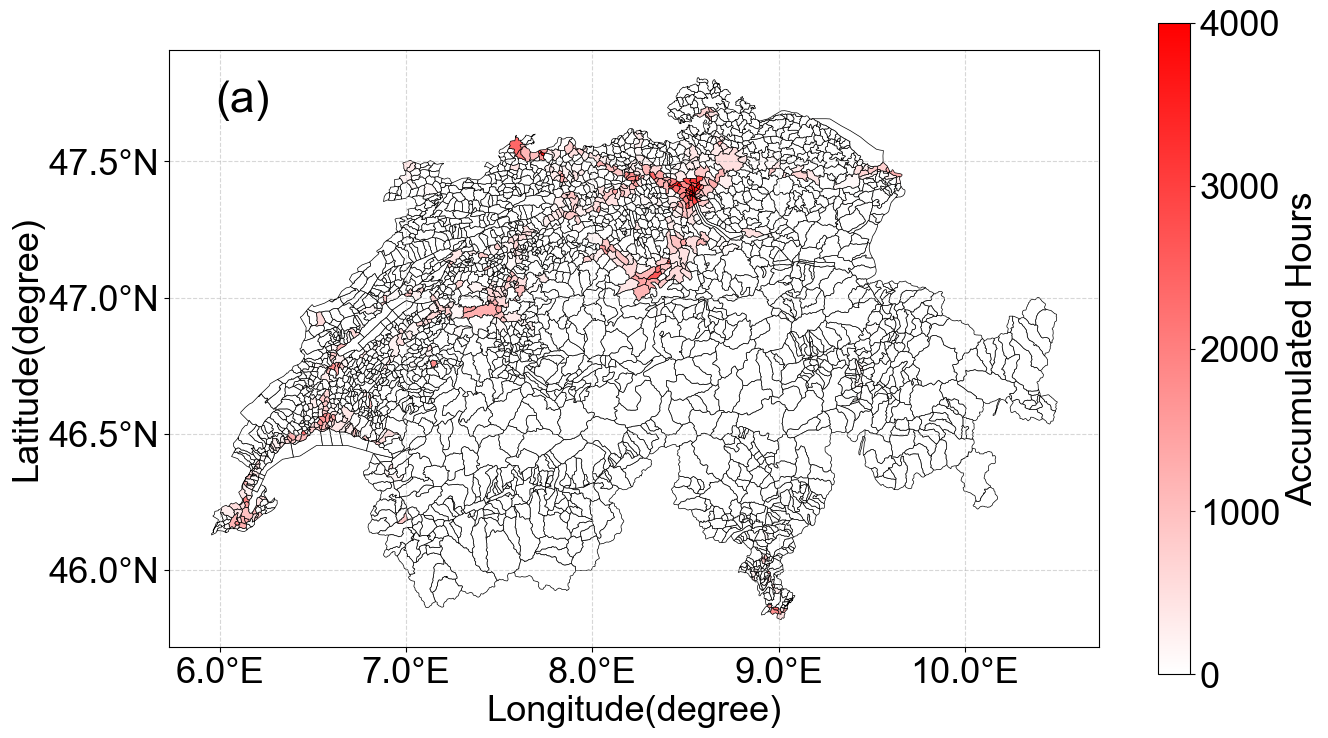

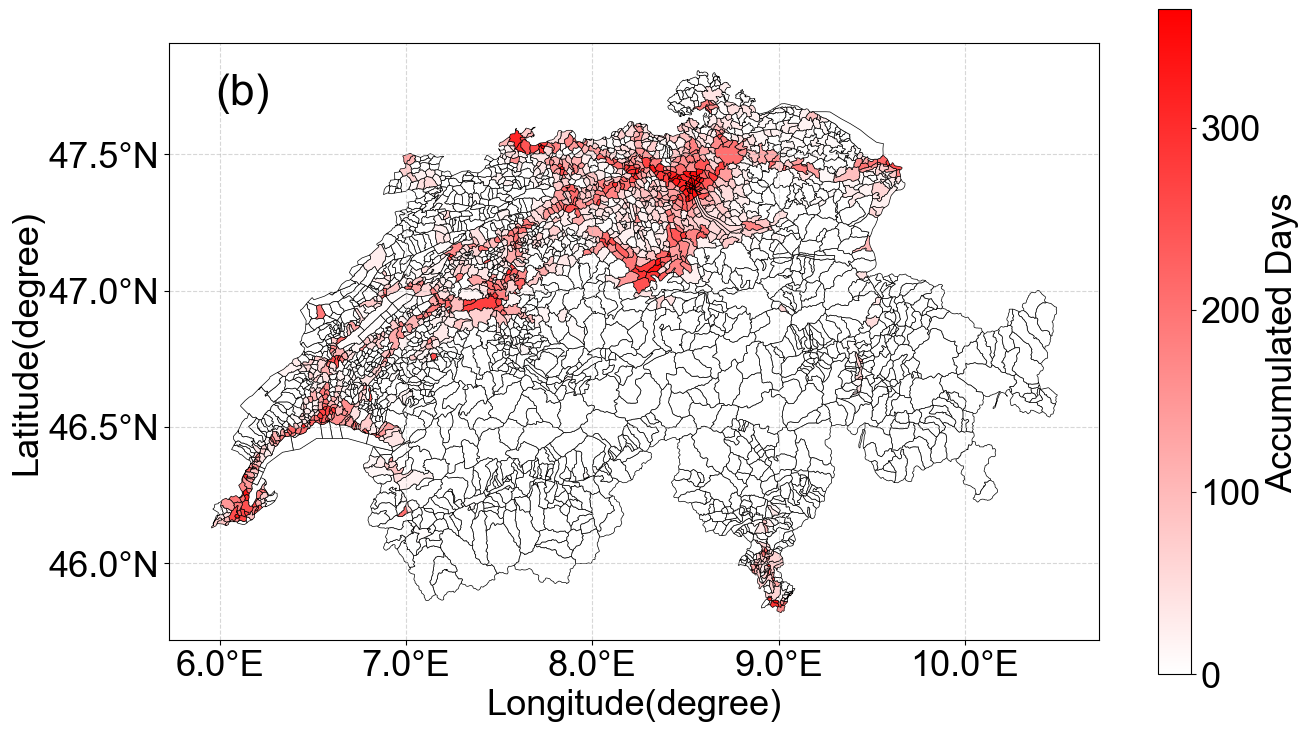

In [128]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, MaxNLocator
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 26
import numpy as np

gdf = gpd.read_file('../../pncEstimator-main/data/geoshp/gadm36_CHE_3.shp')
data_plot.rename(columns={'District': 'NAME_3'}, inplace=True)
gdf = gdf.merge(data_plot, on='NAME_3', how='inner')

cmap_dict_high = {'blue':   [(0.0,  1.0, 1.0),
                        (1.0,  0.0, 0.0)],
             'green': [(0.0,  1.0, 1.0),
                        (1.0,  0.0, 0.0)],
             'red':   [(0.0,  1.0, 1.0),
                        (1.0,  1.0, 1.0)]}
cmap_high = LinearSegmentedColormap('CustomMap', cmap_dict_high)

plot_cols = ['hour_high_pnc_pop', 'day_high_pnc_pop']
figure_num = len(plot_cols)
plot_min_max = [(0, 4000), (0, 365)]
plot_label = ['Accumulated Hours', 'Accumulated Days']
plot_camp = [cmap_high, cmap_high]
title_list = ['(a)', '(b)']

for i in range(figure_num):
    fig, ax = plt.subplots(1, 1, figsize=(14, 8), dpi=100)
    gdf.plot(column=plot_cols[i], ax=ax, legend=False,
             cmap=plot_camp[i], edgecolor='k', linewidth=0.5,
             vmin=plot_min_max[i][0], vmax=plot_min_max[i][1])
    sm = plt.cm.ScalarMappable(cmap=plot_camp[i],
                               norm=plt.Normalize(vmin=plot_min_max[i][0], vmax=plot_min_max[i][1]))
    sm._A = []
    cbar = fig.colorbar(sm, ax=ax, extend = 'neither',
                        label=plot_label[i])
    cbar.locator = MaxNLocator(integer=True, nbins=4)
    # cbar.locator = FixedLocator(plot_min_max[i])
    cbar.update_ticks()
    ax.set_axis_on()
    ax.set_xlabel('Longitude(degree)')
    ax.set_ylabel('Latitude(degree)')
    x_ticks = ax.get_xticks()
    new_x_ticks = [f'{x:.1f}°E' for x in x_ticks]
    ax.xaxis.set_major_locator(FixedLocator(x_ticks))
    ax.set_xticklabels(new_x_ticks)
    y_ticks = ax.get_yticks()
    new_y_ticks = [f'{y:.1f}°N' for y in y_ticks]
    ax.yaxis.set_major_locator(FixedLocator(y_ticks))
    ax.set_yticklabels(new_y_ticks)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.text(x=0.05, y=0.95, s = title_list[i], verticalalignment='top', horizontalalignment='left',
         fontsize=32, transform=plt.gca().transAxes)
    plt.tight_layout()
    plt.savefig(f'../SI_figure/S4/{plot_cols[i]}.png', dpi=600, bbox_inches='tight')
    plt.show()

93 803 1790
0.7720090632970196
0.22799093670298187


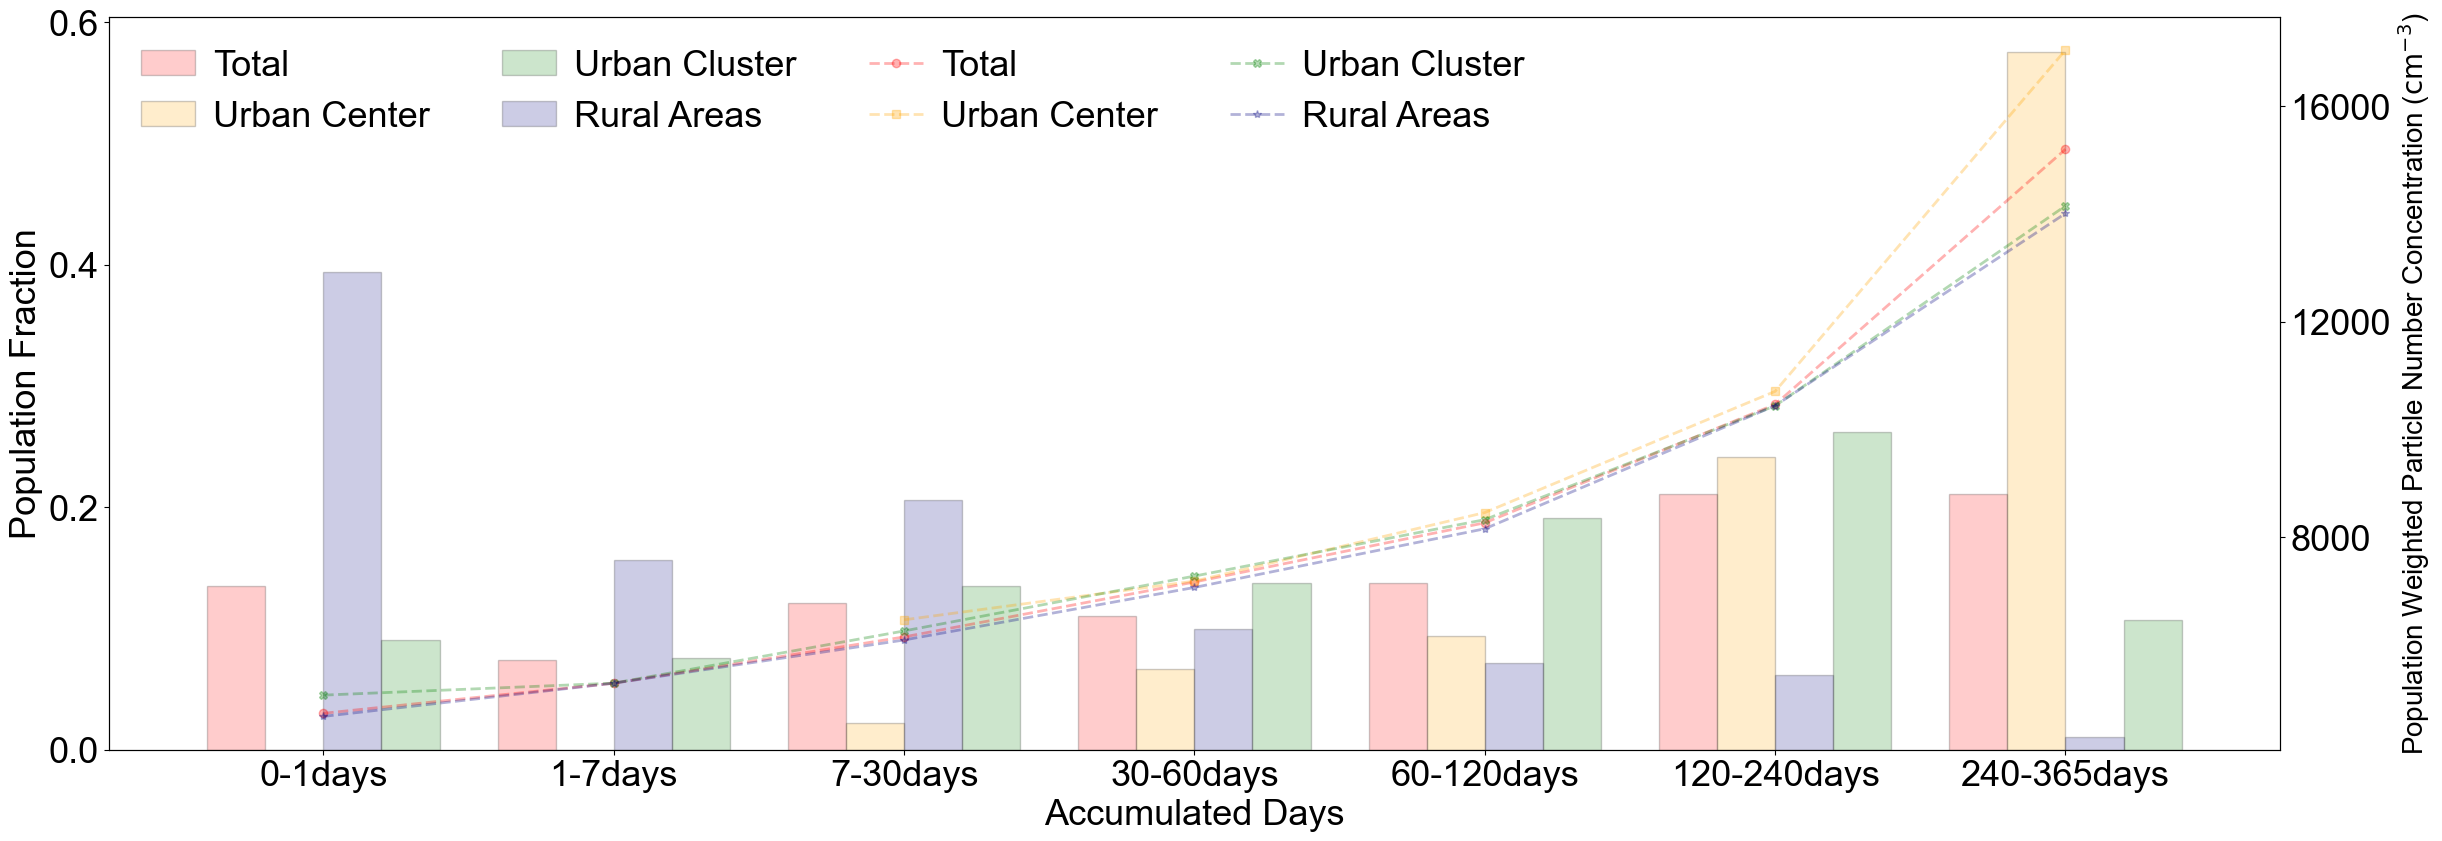

In [129]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator, FixedLocator
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 26

cities_data = data_plot[data_plot['cities'] == 1]
towns_data = data_plot[data_plot['towns'] == 1]
rural_data = data_plot[data_plot['rural'] == 1]
print(len(cities_data), len(towns_data), len(rural_data))
print(sum(cities_data['pop_bt_mean'])/sum(data_plot['pop_bt_mean'])+sum(towns_data['pop_bt_mean'])/sum(data_plot['pop_bt_mean']))
print(sum(rural_data['pop_bt_mean'])/sum(data_plot['pop_bt_mean']))

weights_total = data_plot['pop_bt_mean'].values/np.sum(data_plot['pop_bt_mean'].values)
weights_cities = cities_data['pop_bt_mean'].values/np.sum(cities_data['pop_bt_mean'].values)
weights_towns = towns_data['pop_bt_mean'].values/np.sum(towns_data['pop_bt_mean'].values)
weights_rural = rural_data['pop_bt_mean'].values/np.sum(rural_data['pop_bt_mean'].values)

fig, ax = plt.subplots(figsize=(25, 9), dpi=100)
bins_day = np.array([0, 1, 7, 30, 60, 120, 240, 365])
bin_centers = np.array([0, 500, 1000, 1500, 2000, 2500, 3000])
bin_width = 200
hist_total, _ = np.histogram(data_plot['day_high_pnc_pop'], bins=bins_day, weights=weights_total)
hist1, _ = np.histogram(cities_data['day_high_pnc_pop'], bins=bins_day, weights=weights_cities)
hist2, _ = np.histogram(towns_data['day_high_pnc_pop'], bins=bins_day, weights=weights_towns)
hist3, _ = np.histogram(rural_data['day_high_pnc_pop'], bins=bins_day, weights=weights_rural)
ax.bar(bin_centers - bin_width/4*3, hist_total, width=bin_width/2,
       color='red', edgecolor='black', label='Total', alpha=0.2)
ax.bar(bin_centers - bin_width/4, hist1, width=bin_width/2,
       color='orange', edgecolor='black', label='Urban Center', alpha=0.2)
ax.bar(bin_centers + bin_width/4*3, hist2, width=bin_width/2, color='green',
       edgecolor='black', label='Urban Cluster', alpha=0.2)
ax.bar(bin_centers + bin_width/4, hist3, width=bin_width/2,
       color='navy', edgecolor='black', label='Rural Areas', alpha=0.2)
# for i in range(len(hist_total)):
#     percentage0 = hist_total[i] / sum(hist_total)
#     percentage1 = hist1[i] / sum(hist1)
#     percentage2 = hist2[i] / sum(hist2)
#     percentage3 = hist3[i] / sum(hist3)
#     ax.text(bin_centers[i] - bin_width/4*3, hist_total[i], f'{percentage0:.3f}',
#             ha='center', fontsize=15, color='red')
#     ax.text(bin_centers[i] - bin_width/4, hist1[i], f'{percentage1:.3f}',
#                 ha='center', fontsize=15, color='orange')
#     ax.text(bin_centers[i] + bin_width/4*3, hist2[i], f'{percentage2:.3f}',
#                      ha='center', fontsize=15, color='green')
#     ax.text(bin_centers[i] + bin_width/4, hist3[i], f'{percentage3:.3f}',
#                      ha='center', fontsize=15, color='navy')
ax.set_xlabel('Accumulated Days')
ax.set_ylabel('Population Fraction')
ax.yaxis.set_major_locator(MaxNLocator(4))
ax.set_xticks(bin_centers)
ax.set_xticklabels(['0-1days', '1-7days', '7-30days', '30-60days',
                    '60-120days', '120-240days','240-365days'])

ax2 = ax.twinx()
data_plot['day_level'] = pd.cut(data_plot['day_high_pnc_pop'], bins=bins_day)
cities_data['day_level'] = pd.cut(cities_data['day_high_pnc_pop'], bins=bins_day)
towns_data['day_level'] = pd.cut(towns_data['day_high_pnc_pop'], bins=bins_day)
rural_data['day_level'] = pd.cut(rural_data['day_high_pnc_pop'], bins=bins_day)
pnc_day_levels = data_plot.groupby('day_level')['weighted_pnc_pop_bt'].mean()
cities_pnc_day_levels = cities_data.groupby('day_level')['weighted_pnc_pop_bt'].mean()
towns_pnc_day_levels = towns_data.groupby('day_level')['weighted_pnc_pop_bt'].mean()
rural_pnc_day_levels = rural_data.groupby('day_level')['weighted_pnc_pop_bt'].mean()
ax2.plot(bin_centers, pnc_day_levels, color='red', alpha=0.3,
         marker='o', linestyle='--', linewidth=2, label='Total')
ax2.plot(bin_centers, cities_pnc_day_levels, color='orange', alpha=0.3,
               marker='s', linestyle='--', linewidth=2, label='Urban Center')
ax2.plot(bin_centers, towns_pnc_day_levels, color='green', alpha=0.3,
                     marker='X', linestyle='--', linewidth=2, label='Urban Cluster')
ax2.plot(bin_centers, rural_pnc_day_levels, color='navy', alpha=0.3,
                     marker='*', linestyle='--', linewidth=2, label='Rural Areas')
ax2.set_ylabel(r'Population Weighted Particle Number Concentration ($\mathrm{cm}^{-3}$)', fontsize=20)
ax2.yaxis.set_major_locator(MaxNLocator(4))

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left',
           frameon=False, fontsize=26, handlelength=1.5, handletextpad=0.5, ncol=4)

plt.tight_layout()
plt.savefig('./figure/day_high_pnc_pop_hist.png', dpi=600, bbox_inches='tight')
plt.show()

93 803 1790
0.7720090632970196
0.22799093670298187


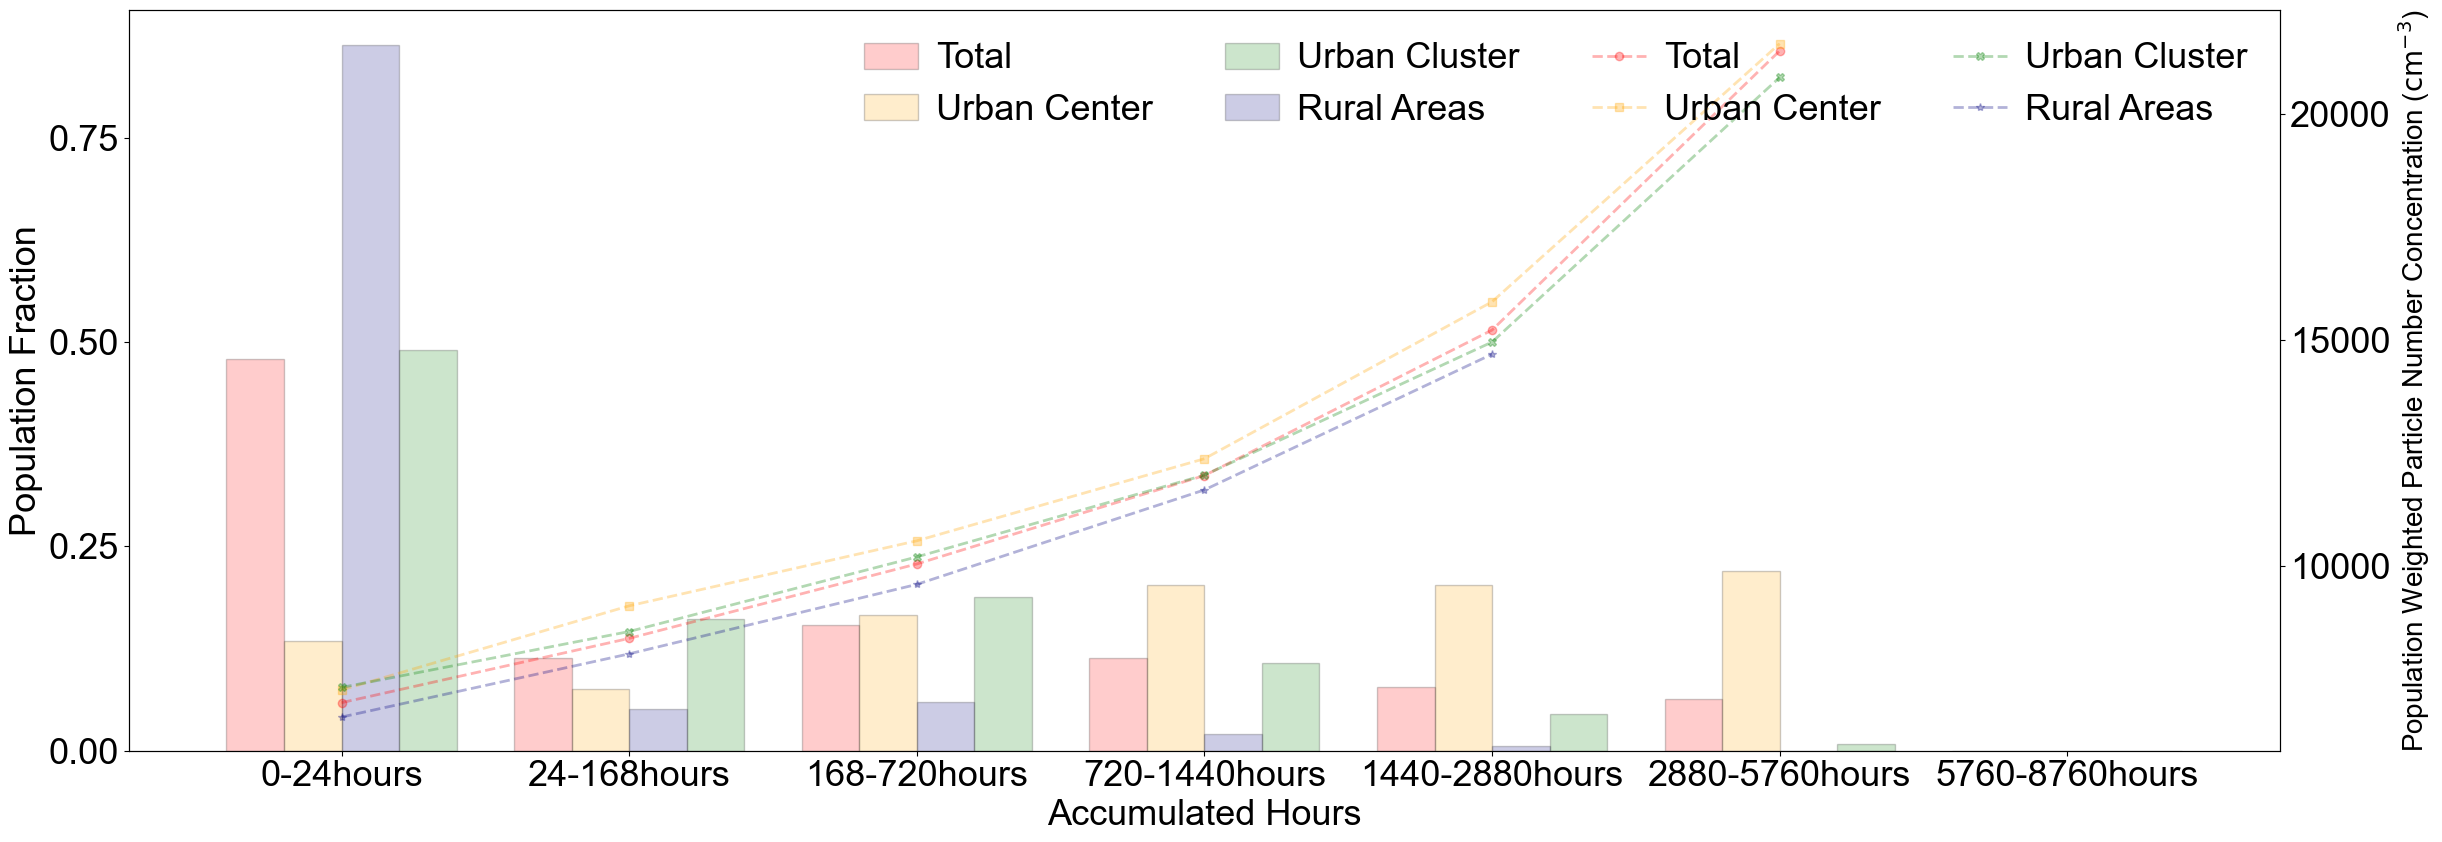

In [130]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator, FixedLocator
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 26

cities_data = data_plot[data_plot['cities'] == 1]
towns_data = data_plot[data_plot['towns'] == 1]
rural_data = data_plot[data_plot['rural'] == 1]
print(len(cities_data), len(towns_data), len(rural_data))
print(sum(cities_data['pop_bt_mean'])/sum(data_plot['pop_bt_mean'])+sum(towns_data['pop_bt_mean'])/sum(data_plot['pop_bt_mean']))
print(sum(rural_data['pop_bt_mean'])/sum(data_plot['pop_bt_mean']))

weights_total = data_plot['pop_bt_mean'].values/np.sum(data_plot['pop_bt_mean'].values)
weights_cities = cities_data['pop_bt_mean'].values/np.sum(cities_data['pop_bt_mean'].values)
weights_towns = towns_data['pop_bt_mean'].values/np.sum(towns_data['pop_bt_mean'].values)
weights_rural = rural_data['pop_bt_mean'].values/np.sum(rural_data['pop_bt_mean'].values)

fig, ax = plt.subplots(figsize=(25, 9), dpi=100)
bins = np.array([0, 24, 24*7, 24*30, 24*60, 24*120, 24*240, 24*365])
bin_centers = np.array([0, 500, 1000, 1500, 2000, 2500, 3000])
bin_width = 200
hist0, _ = np.histogram(data_plot['hour_high_pnc_pop'], bins=bins, weights=weights_total)
hist1, _ = np.histogram(cities_data['hour_high_pnc_pop'], bins=bins, weights=weights_cities)
hist2, _ = np.histogram(towns_data['hour_high_pnc_pop'], bins=bins, weights=weights_towns)
hist3, _ = np.histogram(rural_data['hour_high_pnc_pop'], bins=bins, weights=weights_rural)
ax.bar(bin_centers - bin_width/4*3, hist0, width=bin_width/2,
       color='red', edgecolor='black', label='Total', alpha=0.2)
ax.bar(bin_centers - bin_width/4, hist1, width=bin_width/2,
       color='orange', edgecolor='black', label='Urban Center', alpha=0.2)
ax.bar(bin_centers + bin_width/4*3, hist2, width=bin_width/2, color='green',
       edgecolor='black', label='Urban Cluster', alpha=0.2)
ax.bar(bin_centers + bin_width/4, hist3, width=bin_width/2,
       color='navy', edgecolor='black', label='Rural Areas', alpha=0.2)
# for i in range(len(hist0)):
#     percentage0 = hist0[i] / sum(hist0)
#     percentage1 = hist1[i] / sum(hist1)
#     percentage2 = hist2[i] / sum(hist2)
#     percentage3 = hist3[i] / sum(hist3)
#     ax.text(bin_centers[i] - bin_width/4*3, hist0[i], f'{percentage0:.3f}',
#             ha='center', fontsize=15, color='red')
#     ax.text(bin_centers[i] - bin_width/4, hist1[i], f'{percentage1:.3f}',
#                 ha='center', fontsize=15, color='orange')
#     ax.text(bin_centers[i] + bin_width/4*3, hist2[i], f'{percentage2:.3f}',
#                      ha='center', fontsize=15, color='green')
#     ax.text(bin_centers[i] + bin_width/4, hist3[i], f'{percentage3:.3f}',
#                      ha='center', fontsize=15, color='navy')
ax.set_xlabel('Accumulated Hours')
ax.set_ylabel('Population Fraction')
ax.yaxis.set_major_locator(MaxNLocator(4))
ax.set_xticks(bin_centers)
ax.set_xticklabels(['0-24hours', '24-168hours', '168-720hours', '720-1440hours',
                    '1440-2880hours', '2880-5760hours','5760-8760hours'])

ax2 = ax.twinx()
data_plot['hour_level'] = pd.cut(data_plot['hour_high_pnc_pop'], bins=bins)
cities_data['hour_level'] = pd.cut(cities_data['hour_high_pnc_pop'], bins=bins)
towns_data['hour_level'] = pd.cut(towns_data['hour_high_pnc_pop'], bins=bins)
rural_data['hour_level'] = pd.cut(rural_data['hour_high_pnc_pop'], bins=bins)
pnc_day_levels = data_plot.groupby('hour_level')['weighted_pnc_pop_bt'].mean()
cities_pnc_day_levels = cities_data.groupby('hour_level')['weighted_pnc_pop_bt'].mean()
towns_pnc_day_levels = towns_data.groupby('hour_level')['weighted_pnc_pop_bt'].mean()
rural_pnc_day_levels = rural_data.groupby('hour_level')['weighted_pnc_pop_bt'].mean()
ax2.plot(bin_centers, pnc_day_levels, color='red', alpha=0.3,
         marker='o', linestyle='--', linewidth=2, label='Total')
ax2.plot(bin_centers, cities_pnc_day_levels, color='orange', alpha=0.3,
               marker='s', linestyle='--', linewidth=2, label='Urban Center')
ax2.plot(bin_centers, towns_pnc_day_levels, color='green', alpha=0.3,
                     marker='X', linestyle='--', linewidth=2, label='Urban Cluster')
ax2.plot(bin_centers, rural_pnc_day_levels, color='navy', alpha=0.3,
                     marker='*', linestyle='--', linewidth=2, label='Rural Areas')
ax2.set_ylabel(r'Population Weighted Particle Number Concentration ($\mathrm{cm}^{-3}$)', fontsize=20)
ax2.yaxis.set_major_locator(MaxNLocator(4))

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right',
           frameon=False, fontsize=26, handlelength=1.5, handletextpad=0.5, ncol=4)

plt.tight_layout()
plt.savefig('./figure/hour_high_pnc_pop_hist.png', dpi=600, bbox_inches='tight')
plt.show()

93 803 1790
0.001307345780536373 0.9740164328489427
0.001307345780536373 0.7566670610078587


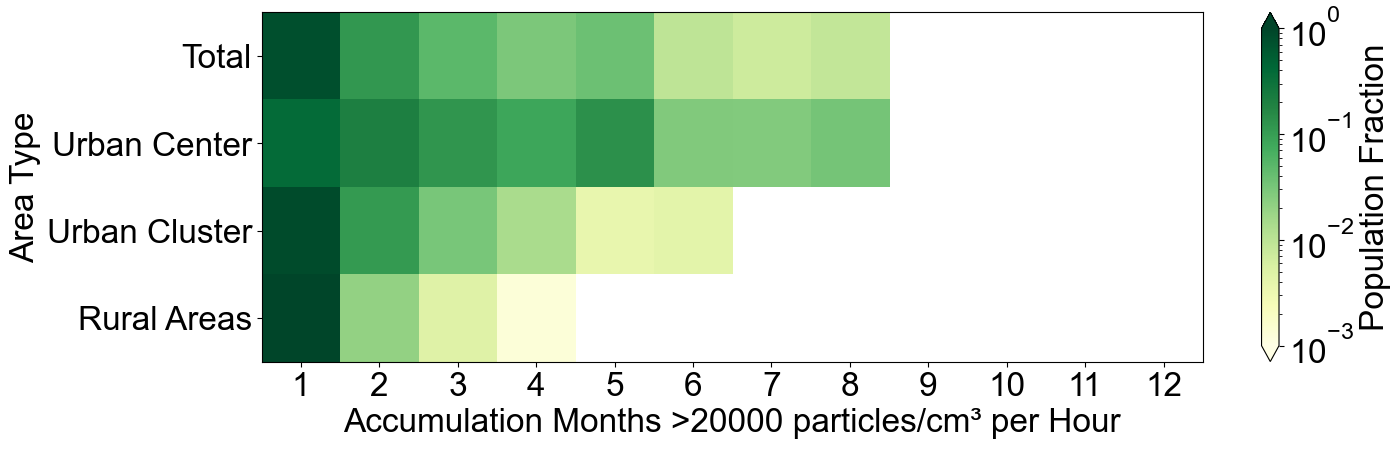

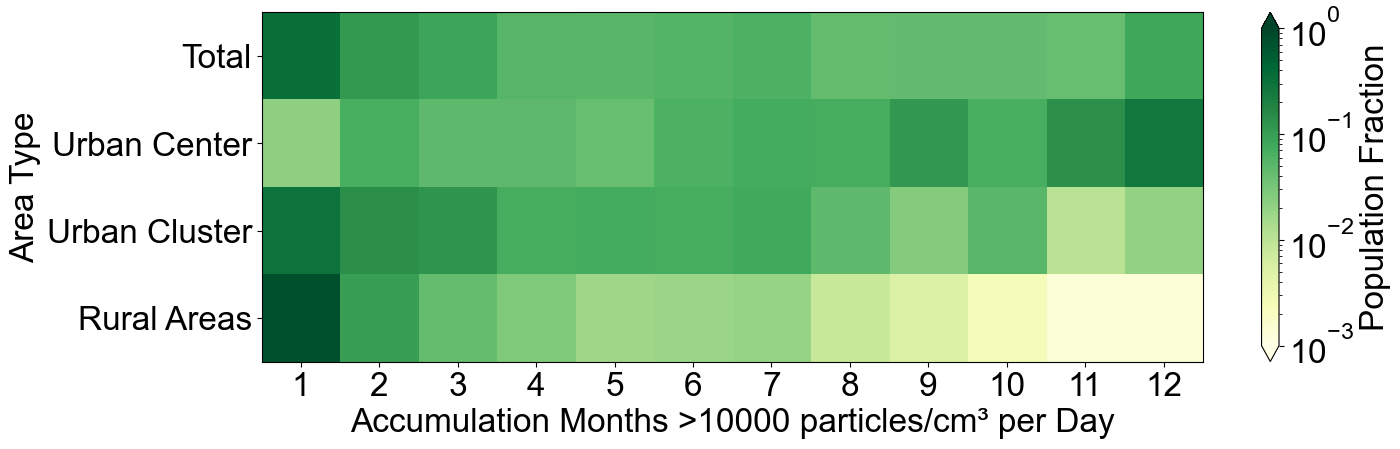

In [131]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import calplot
from matplotlib.ticker import MaxNLocator, FixedLocator
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 24

cities_data = data_plot[data_plot['cities'] == 1]
towns_data = data_plot[data_plot['towns'] == 1]
rural_data = data_plot[data_plot['rural'] == 1]
print(len(cities_data), len(towns_data), len(rural_data))


weights_total = data_plot['pop_bt_mean'].values/np.sum(data_plot['pop_bt_mean'].values)
weights_cities = cities_data['pop_bt_mean'].values/np.sum(cities_data['pop_bt_mean'].values)
weights_towns = towns_data['pop_bt_mean'].values/np.sum(towns_data['pop_bt_mean'].values)
weights_rural = rural_data['pop_bt_mean'].values/np.sum(rural_data['pop_bt_mean'].values)

hour_bins = np.arange(0, 365*24, 30*24)
hour_bins[-1] = 365*24
day_bins = np.arange(0, 365, 30)
day_bins[-1] = 365

hist_hour_total, _ = np.histogram(data_plot['hour_high_pnc_pop'], bins=hour_bins, weights=weights_total)
hist_hour_cities, _ = np.histogram(cities_data['hour_high_pnc_pop'], bins=hour_bins, weights=weights_cities)
hist_hour_towns, _ = np.histogram(towns_data['hour_high_pnc_pop'], bins=hour_bins, weights=weights_towns)
hist_hour_rural, _ = np.histogram(rural_data['hour_high_pnc_pop'], bins=hour_bins, weights=weights_rural)
hist_day_total, _ = np.histogram(data_plot['day_high_pnc_pop'], bins=day_bins, weights=weights_total)
hist_day_cities, _ = np.histogram(cities_data['day_high_pnc_pop'], bins=day_bins, weights=weights_cities)
hist_day_towns, _ = np.histogram(towns_data['day_high_pnc_pop'], bins=day_bins, weights=weights_towns)
hist_day_rural, _ = np.histogram(rural_data['day_high_pnc_pop'], bins=day_bins, weights=weights_rural)


heatmap_hour_list = np.concatenate([hist_hour_total, hist_hour_cities,
                                   hist_hour_towns, hist_hour_rural]).reshape(4, 12)
heatmap_day_list = np.concatenate([hist_day_total, hist_day_cities,
                                      hist_day_towns, hist_day_rural]).reshape(4, 12)
print(heatmap_hour_list[heatmap_hour_list>0].min(), heatmap_hour_list.max())
print(heatmap_day_list[heatmap_day_list>0].min(), heatmap_day_list.max())

fig, ax = plt.subplots(figsize=(15, 5), dpi=100)
cmap = plt.get_cmap('YlGn')
norm = mcolors.LogNorm(vmin=0.001, vmax=1)
cax = ax.imshow(heatmap_hour_list,
                cmap=cmap, aspect='auto',
                norm=norm)
cbar = fig.colorbar(cax, orientation='vertical', extend='both')
cbar.set_label('Population Fraction')
ax.set_xlabel('Accumulation Months >20000 particles/cm³ per Hour')
ax.set_ylabel('Area Type')
ax.set_xticks(np.arange(12))
ax.set_yticks(np.arange(4))
ax.set_xticklabels(np.arange(1, 13))
ax.set_yticklabels(['Total', 'Urban Center', 'Urban Cluster', 'Rural Areas'])
ax.set_xticks(np.arange(0, 12, 1), minor=True)
ax.set_yticks(np.arange(0, 4, 1), minor=True)
ax.grid(which='minor', color='k', linestyle='-', linewidth=1)
plt.tight_layout()
plt.savefig('./figure/hour_high_pnc_pop_heatmap.png', dpi=600, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(15, 5), dpi=100)
cmap = plt.get_cmap('YlGn')
norm = mcolors.LogNorm(vmin=0.001, vmax=1)
cax = ax.imshow(heatmap_day_list,
                cmap=cmap, aspect='auto',
                norm=norm)
cbar = fig.colorbar(cax, orientation='vertical', extend='both')
cbar.set_label('Population Fraction')
ax.set_xlabel('Accumulation Months >10000 particles/cm³ per Day')
ax.set_ylabel('Area Type')
ax.set_xticks(np.arange(12))
ax.set_yticks(np.arange(4))
ax.set_xticklabels(np.arange(1, 13))
ax.set_yticklabels(['Total', 'Urban Center', 'Urban Cluster', 'Rural Areas'])
ax.set_xticks(np.arange(0, 12, 1), minor=True)
ax.set_yticks(np.arange(0, 4, 1), minor=True)
ax.grid(which='minor', color='k', linestyle='-', linewidth=1)
plt.tight_layout()
plt.savefig('./figure/day_high_pnc_pop_heatmap.png', dpi=600, bbox_inches='tight')
plt.show()

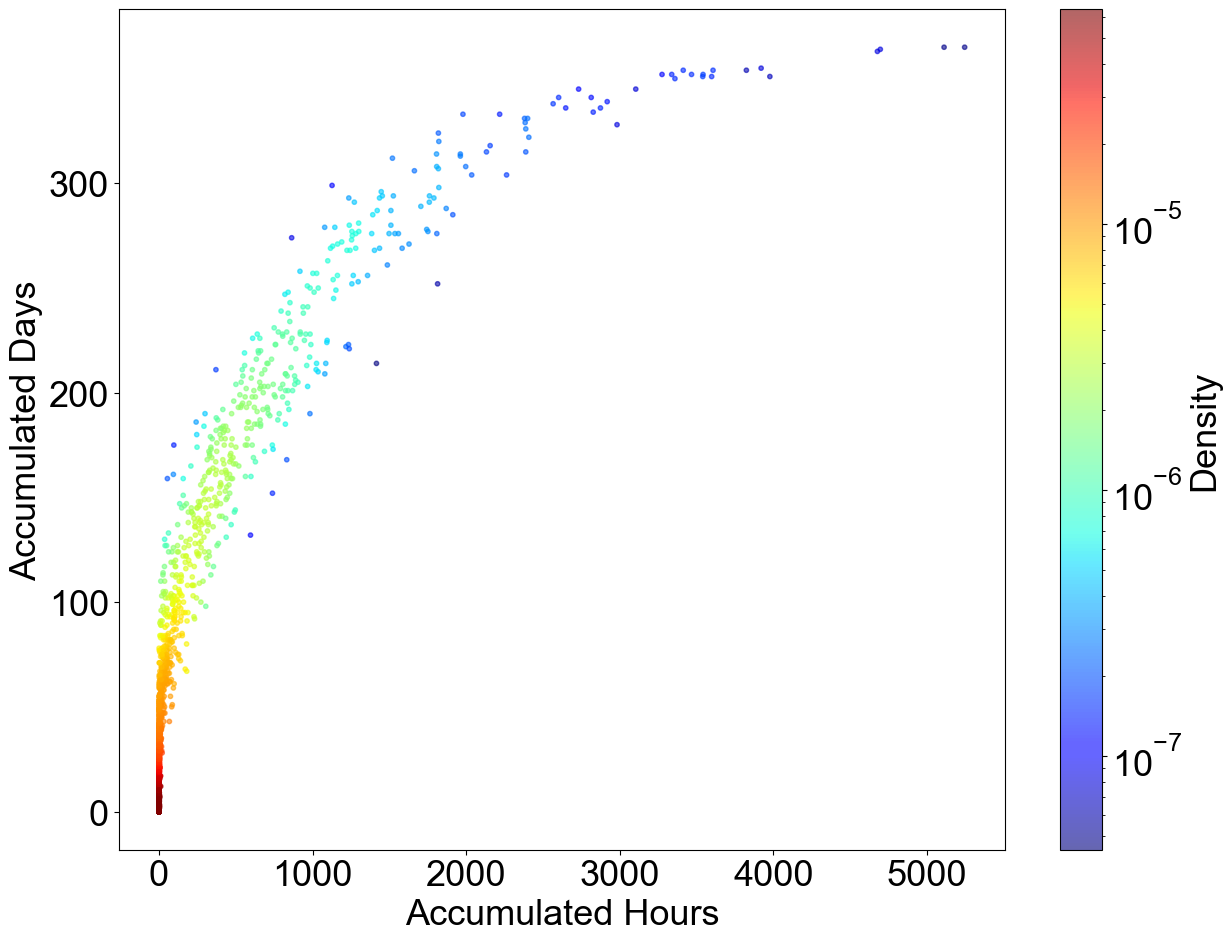

In [132]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
import matplotlib.colors as colors
import matplotlib.ticker as ticker
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 26

sns_data1 = data_plot[['hour_high_pnc_pop', 'day_high_pnc_pop']]
sns_data1.columns = ['Hours', 'Days']
x = sns_data1['Hours']
y = sns_data1['Days']
xy = np.vstack([x, y])
density = gaussian_kde(xy)(xy)

plt.figure(figsize=(13, 10), dpi=100)
scatter = plt.scatter(x, y, c=density, s=10, cmap='jet',
                      norm=colors.LogNorm(vmin=density.min(), vmax=density.max()), 
                      alpha=0.6)
formatter = ticker.LogFormatter(10, labelOnlyBase=False) 
plt.colorbar(scatter, label='Density')
cbar.ax.yaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_locator(MaxNLocator(5))
plt.gca().xaxis.set_major_locator(MaxNLocator(6))
plt.xlabel('Accumulated Hours')
plt.ylabel('Accumulated Days')
plt.tight_layout()
plt.savefig('./figure/scatterplot1.png', dpi=600, bbox_inches='tight')
plt.show()